# merge 데이터 전처리

In [1]:
import pandas as pd
import numpy as np
df_trd= pd.read_feather("../data/make_data/df_trd_merged.feather")
df_anc= pd.read_feather("../data/make_data/df_anc_merged.feather")
df_mst= pd.read_feather("../data/make_data/df_mst.feather")
df_hkd= pd.read_feather("../data/make_data/df_hkd.feather")
df_soc= pd.read_feather("../data/make_data/df_soc.feather")

In [2]:
df_trd['부속복리시설'] = df_trd['부속복리시설'].fillna('empty')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_seq_items', None)

df_trd.columns

Index(['아파트코드', '아파트명', '도로명주소', '법정동코드', '기준년월', '면적코드', '거래량', '누적거래량',
       '회전율', '면적코드별최소실거래가', '면적코드별최대실거래가', '면적코드별평균실거래가', '면적코드별중위실거래가',
       '최근거래일자', '거래동향', '인근아파트거래동향', '해당읍면동거래동향', '경도', '위도', '기준연도', '세대수',
       '사용승인일자', '분양유형', '동수', '복도유형', '시공기업명', '건물구조', '승강기수', '지상주차대수',
       '지하주차대수', 'CCTV수', '부속복리시설', '학군정보', '교차집계구총인구수', '교차집계구생산인구수',
       '교차집계구유소년인구수', '교차집계구노년인구수', '인구밀도', '인구밀도지표', '총부양비', '유소년부양비',
       '노년부양비', '노령화지수', '연령구조지표', '지하철역까지_거리', '지하철역명', '호선', '공원수', '공원총면적',
       '환경생활지수', '환경평가점수', '아파트단지내경사도평균값', '아파트단지내경사도최저값', '아파트단지내경사도최고값',
       '아파트단지인근경사도평균값', '아파트단지인근경사도최저값', '아파트단지인근경사도최고값', '차량접근가능시설수',
       '5분_car', '10분_car', '15분_car', '20분_car', '25분_car', '30분_car',
       '35분_car', '40분_car', '45분_car', '50분_car', '55분_car', '60분_car',
       '도보접근가능시설수', '1분_walk', '2분_walk', '3분_walk', '4분_walk', '5분_walk',
       '6분_walk', '7분_walk', '8분_walk', '9분_walk', '10분_walk', '11분_walk',
       '12분_walk', '13분_walk', '14분_w

In [4]:
df_trd['15_car'] = df_trd['5분_car'] + df_trd['10분_car'] + df_trd['15분_car']
df_trd['30_car'] = df_trd['15_car'] + df_trd['20분_car'] + df_trd['25분_car'] + df_trd['30분_car']
df_trd['45_car'] = df_trd['30_car'] + df_trd['35분_car'] + df_trd['40분_car'] + df_trd['45분_car']
df_trd['60_car'] = df_trd['45_car'] + df_trd['50분_car'] + df_trd['55분_car'] + df_trd['60분_car']
df_trd['5_walk'] = df_trd['1분_walk'] + df_trd['2분_walk'] + df_trd['3분_walk'] + df_trd['4분_walk'] + df_trd['5분_walk']
df_trd['10_walk'] = df_trd['5_walk'] + df_trd['6분_walk'] + df_trd['7분_walk'] + df_trd['8분_walk'] + df_trd['9분_walk'] + df_trd['10분_walk']
df_trd['20_walk'] = df_trd['10_walk'] + df_trd['11분_walk'] + df_trd['12분_walk'] + df_trd['13분_walk'] + df_trd['14분_walk'] + df_trd['15분_walk'] + df_trd['16분_walk'] + df_trd['17분_walk'] + df_trd['18분_walk'] + df_trd['19분_walk'] + df_trd['20분_walk']
df_trd['30_walk'] = df_trd['20_walk'] + df_trd['21분_walk'] + df_trd['22분_walk'] + df_trd['23분_walk'] + df_trd['24분_walk'] + df_trd['25분_walk'] + df_trd['26분_walk'] + df_trd['27분_walk'] + df_trd['28분_walk'] + df_trd['29분_walk'] + df_trd['30분_walk']
df_trd.drop(df_trd.columns[58:70],axis=1, inplace=True)
df_trd.drop(df_trd.columns[59:89],axis=1, inplace=True)
df_trd.columns

Index(['아파트코드', '아파트명', '도로명주소', '법정동코드', '기준년월', '면적코드', '거래량', '누적거래량',
       '회전율', '면적코드별최소실거래가', '면적코드별최대실거래가', '면적코드별평균실거래가', '면적코드별중위실거래가',
       '최근거래일자', '거래동향', '인근아파트거래동향', '해당읍면동거래동향', '경도', '위도', '기준연도', '세대수',
       '사용승인일자', '분양유형', '동수', '복도유형', '시공기업명', '건물구조', '승강기수', '지상주차대수',
       '지하주차대수', 'CCTV수', '부속복리시설', '학군정보', '교차집계구총인구수', '교차집계구생산인구수',
       '교차집계구유소년인구수', '교차집계구노년인구수', '인구밀도', '인구밀도지표', '총부양비', '유소년부양비',
       '노년부양비', '노령화지수', '연령구조지표', '지하철역까지_거리', '지하철역명', '호선', '공원수', '공원총면적',
       '환경생활지수', '환경평가점수', '아파트단지내경사도평균값', '아파트단지내경사도최저값', '아파트단지내경사도최고값',
       '아파트단지인근경사도평균값', '아파트단지인근경사도최저값', '아파트단지인근경사도최고값', '차량접근가능시설수',
       '도보접근가능시설수', '아파트단지내표고평균값', '아파트단지내표고최저값', '아파트단지내표고최고값',
       '아파트단지인근표고평균값', '아파트단지인근표고최저값', '아파트단지인근표고최고값', '근접 고도 지점 거리', 'cpi',
       '경제심리지수(원계열)', '기존_가계대출', '신규_가계대출', '기준금리', '15_car', '30_car',
       '45_car', '60_car', '5_walk', '10_walk', '20_walk', '30_walk'],
      dtype='object')

In [5]:
df_trd = df_trd[df_trd['거래량']>0]

In [6]:
import numpy as np
for i in df_trd.columns:
    if pd.isna(df_trd[i]).sum():
        print("{}의 결측치 비율 : {}%".format(i,np.round((pd.isna(df_trd[i]).sum()/df_trd.shape[0])*100,2)))

거래동향의 결측치 비율 : 28.49%
인근아파트거래동향의 결측치 비율 : 3.57%
해당읍면동거래동향의 결측치 비율 : 2.17%
세대수의 결측치 비율 : 0.29%
사용승인일자의 결측치 비율 : 0.48%
분양유형의 결측치 비율 : 29.64%
동수의 결측치 비율 : 3.34%
복도유형의 결측치 비율 : 29.65%
시공기업명의 결측치 비율 : 29.72%
건물구조의 결측치 비율 : 4.98%
승강기수의 결측치 비율 : 3.34%
지상주차대수의 결측치 비율 : 30.36%
지하주차대수의 결측치 비율 : 30.38%
CCTV수의 결측치 비율 : 30.38%
학군정보의 결측치 비율 : 0.05%
교차집계구총인구수의 결측치 비율 : 0.06%
교차집계구생산인구수의 결측치 비율 : 0.06%
교차집계구유소년인구수의 결측치 비율 : 0.06%
교차집계구노년인구수의 결측치 비율 : 0.06%
인구밀도의 결측치 비율 : 0.06%
인구밀도지표의 결측치 비율 : 0.05%
총부양비의 결측치 비율 : 0.05%
유소년부양비의 결측치 비율 : 0.05%
노년부양비의 결측치 비율 : 0.05%
노령화지수의 결측치 비율 : 0.05%
연령구조지표의 결측치 비율 : 0.05%


In [7]:
trd_col = df_trd.isna().sum()
print(len(df_trd))
trd_col[trd_col>0]

29335


거래동향           8358
인근아파트거래동향      1047
해당읍면동거래동향       637
세대수              85
사용승인일자          140
분양유형           8695
동수              979
복도유형           8698
시공기업명          8717
건물구조           1461
승강기수            979
지상주차대수         8906
지하주차대수         8912
CCTV수          8912
학군정보             15
교차집계구총인구수        19
교차집계구생산인구수       19
교차집계구유소년인구수      19
교차집계구노년인구수       19
인구밀도             19
인구밀도지표           15
총부양비             15
유소년부양비           15
노년부양비            15
노령화지수            15
연령구조지표           15
dtype: int64

In [8]:
len(df_trd[(df_trd['거래동향'].isna())&(df_trd['인근아파트거래동향']==df_trd['해당읍면동거래동향'])])

5029

In [9]:
print(df_trd[df_trd['거래동향'].isna()==False][['아파트명','기준년월','거래동향']])
print(df_trd[df_trd['거래동향'].isna()][['아파트명','기준년월','거래동향']])

             아파트명    기준년월 거래동향
115      경희궁 롯데캐슬  202304  상승세
125      경희궁 롯데캐슬  202309  상승세
126      경희궁 롯데캐슬  202309  상승세
139      경희궁 롯데캐슬  202312  상승세
140      경희궁 롯데캐슬  202312  상승세
...           ...     ...  ...
385377        현대2  202309  상승세
385471  강동리버스트8단지  202306  상승세
385472  강동리버스트8단지  202305  상승세
385481  강동리버스트8단지  202307  상승세
385487  강동리버스트8단지  202309  상승세

[20977 rows x 3 columns]
                           아파트명    기준년월  거래동향
119                    경희궁 롯데캐슬  202303  None
138                    경희궁 롯데캐슬  202209  None
170                    경희궁 롯데캐슬  202306  None
181                          현대  202202  None
200                          현대  202212  None
...                         ...     ...   ...
385338  라이프101동(544)102동(544-1)  202302  None
385354                      현대2  202203  None
385357                      현대2  202305  None
385369                      현대2  202304  None
385400                   율전에버그린  202311  None

[8358 rows x 3 columns]


###### 거래동향 변수는 결측치 대체가 어려운 것을 판단, drop

In [10]:
print(len(df_trd[df_trd['인근아파트거래동향']!=df_trd['해당읍면동거래동향']]),len(df_trd[df_trd['인근아파트거래동향']==df_trd['해당읍면동거래동향']]))

9984 19351


###### 해당읍면동거래동향과 인근아파트거래동향 또한 drop

In [11]:
print(df_trd[df_trd['동수'].isna()][['아파트코드','아파트명','기준년월','동수']])
print(df_trd[df_trd['아파트코드']=='APT1174041723500068000001'][['아파트코드','아파트명','기준년월','동수']])

                            아파트코드          아파트명    기준년월  동수
179     APT1111030000080246000901            현대  202204 NaN
181     APT1111030000080246000901            현대  202202 NaN
189     APT1111030000080246000901            현대  202305 NaN
447     APT1111031000020047000001         이화에수풀  202212 NaN
448     APT1111031000020047000001         이화에수풀  202310 NaN
...                           ...           ...     ...  ..
368505  APT1174031240060091000001     다성이즈빌 아파트  202307 NaN
379318  APT1174041722920030000001       힐데스하임천호  202310 NaN
379322  APT1174041722920030000001       힐데스하임천호  202308 NaN
381104  APT1174041723500068000001  다성이즈빌(387-4)  202310 NaN
381113  APT1174041723500068000001  다성이즈빌(387-4)  202206 NaN

[979 rows x 4 columns]
                            아파트코드          아파트명    기준년월  동수
381104  APT1174041723500068000001  다성이즈빌(387-4)  202310 NaN
381113  APT1174041723500068000001  다성이즈빌(387-4)  202206 NaN


In [12]:
df_trd['동수'] = df_trd.groupby('아파트코드')['동수'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
len(df_trd[df_trd['동수'].isna()])

/tmp/ipykernel_32610/1363677589.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_trd['동수'] = df_trd.groupby('아파트코드')['동수'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


979

In [13]:
print(df_trd[df_trd['세대수'].isna()][['아파트코드','아파트명','기준년월','동수']])
print(df_trd[df_trd['아파트코드']=='APT1114031010020127000001'][['아파트코드','아파트명','기준년월','동수']])

                            아파트코드      아파트명    기준년월  동수
6525    APT1114031010020127000001  오장동 오팰리오  202305 NaN
6535    APT1114031010020127000001  오장동 오팰리오  202304 NaN
6539    APT1114031010020127000001  오장동 오팰리오  202306 NaN
8103    APT1114041030060040001601  청계랜드힐아파트  202303 NaN
8107    APT1114041030060040001601  청계랜드힐아파트  202302 NaN
...                           ...       ...     ...  ..
354779  APT1171041692040041000001    NS파인트리  202312 NaN
365329  APT1174031230230663000001      아스하임  202203 NaN
365341  APT1174031230230663000001      아스하임  202204 NaN
365345  APT1174031230230663000001      아스하임  202207 NaN
365350  APT1174031230230663000001      아스하임  202306 NaN

[85 rows x 4 columns]
                          아파트코드      아파트명    기준년월  동수
6525  APT1114031010020127000001  오장동 오팰리오  202305 NaN
6535  APT1114031010020127000001  오장동 오팰리오  202304 NaN
6539  APT1114031010020127000001  오장동 오팰리오  202306 NaN


###### 동일한 아파트의 관측치들은 모두 결측치 이므로 세대수, 동수 변수도 drop

In [14]:
print(df_trd[df_trd['학군정보'].isna()][['아파트코드','아파트명','기준년월','학군정보']])
print(df_trd[df_trd['아파트코드']=='APT1165031210210391000001'][['아파트코드','아파트명','기준년월','학군정보']])

                            아파트코드 아파트명    기준년월  학군정보
290494  APT1165031210210391000001  무지개  202306  None
290508  APT1165031210210391000001  무지개  202312  None
290527  APT1165031210210391000001  무지개  202308  None
290528  APT1165031210210391000001  무지개  202308  None
290529  APT1165031210210391000001  무지개  202308  None
290535  APT1165031210210391000001  무지개  202307  None
290538  APT1165031210210391000001  무지개  202306  None
290539  APT1165031210210391000001  무지개  202304  None
290543  APT1165031210210391000001  무지개  202309  None
290545  APT1165031210210391000001  무지개  202303  None
290549  APT1165031210210391000001  무지개  202310  None
290552  APT1165031210210391000001  무지개  202305  None
290553  APT1165031210210391000001  무지개  202305  None
290560  APT1165031210210391000001  무지개  202309  None
290561  APT1165031210210391000001  무지개  202309  None
                            아파트코드 아파트명    기준년월  학군정보
290494  APT1165031210210391000001  무지개  202306  None
290508  APT1165031210210391000001  무지개  202312

In [15]:
print(df_trd[df_trd['연령구조지표'].isna()][['아파트코드','아파트명','기준년월','연령구조지표']])
print(df_trd[df_trd['아파트코드']=='APT1165031210210391000001'][['아파트코드','아파트명','기준년월','연령구조지표']])

                            아파트코드 아파트명    기준년월  연령구조지표
290494  APT1165031210210391000001  무지개  202306     NaN
290508  APT1165031210210391000001  무지개  202312     NaN
290527  APT1165031210210391000001  무지개  202308     NaN
290528  APT1165031210210391000001  무지개  202308     NaN
290529  APT1165031210210391000001  무지개  202308     NaN
290535  APT1165031210210391000001  무지개  202307     NaN
290538  APT1165031210210391000001  무지개  202306     NaN
290539  APT1165031210210391000001  무지개  202304     NaN
290543  APT1165031210210391000001  무지개  202309     NaN
290545  APT1165031210210391000001  무지개  202303     NaN
290549  APT1165031210210391000001  무지개  202310     NaN
290552  APT1165031210210391000001  무지개  202305     NaN
290553  APT1165031210210391000001  무지개  202305     NaN
290560  APT1165031210210391000001  무지개  202309     NaN
290561  APT1165031210210391000001  무지개  202309     NaN
                            아파트코드 아파트명    기준년월  연령구조지표
290494  APT1165031210210391000001  무지개  202306     NaN
290508  AP

In [16]:
print(df_trd[df_trd['인구밀도'].isna()][['아파트코드','아파트명','기준년월','인구밀도']])
print(df_trd[df_trd['아파트코드']=='APT1165031210210391000001'][['아파트코드','아파트명','기준년월','인구밀도']])
print(df_trd[df_trd['아파트코드']=='APT1159041600180027000001'][['아파트코드','아파트명','기준년월','인구밀도']])

                            아파트코드        아파트명    기준년월  인구밀도
179     APT1111030000080246000901          현대  202204   NaN
181     APT1111030000080246000901          현대  202202   NaN
189     APT1111030000080246000901          현대  202305   NaN
269944  APT1159041600180027000001  관악푸르지오102동  202308   NaN
290494  APT1165031210210391000001         무지개  202306   NaN
290508  APT1165031210210391000001         무지개  202312   NaN
290527  APT1165031210210391000001         무지개  202308   NaN
290528  APT1165031210210391000001         무지개  202308   NaN
290529  APT1165031210210391000001         무지개  202308   NaN
290535  APT1165031210210391000001         무지개  202307   NaN
290538  APT1165031210210391000001         무지개  202306   NaN
290539  APT1165031210210391000001         무지개  202304   NaN
290543  APT1165031210210391000001         무지개  202309   NaN
290545  APT1165031210210391000001         무지개  202303   NaN
290549  APT1165031210210391000001         무지개  202310   NaN
290552  APT1165031210210391000001       

###### 아파트코드가 APT1165031210210391000001인 관측치에서만 나타나는 결측변수가 여렷 존재. 따라서 관측치 drop

In [17]:
df_trd = df_trd[~df_trd['아파트코드'].isin(['APT1165031210210391000001','APT1111030000080246000901','APT1159041600180027000001'])]

trd_col = df_trd.isna().sum()
print(len(df_trd))
trd_col[trd_col>0]

29316


거래동향         8354
인근아파트거래동향    1043
해당읍면동거래동향     637
세대수            85
사용승인일자        140
분양유형         8691
동수            976
복도유형         8694
시공기업명        8713
건물구조         1458
승강기수          976
지상주차대수       8902
지하주차대수       8908
CCTV수        8908
dtype: int64

In [18]:
print(len(df_trd[df_trd['차량접근가능시설수']==0]['아파트코드'].unique()),len(df_trd[df_trd['15_car']==0]['아파트코드'].unique()))
print(len(df_trd[df_trd['차량접근가능시설수']<=232]['아파트코드'].unique()),len(df_trd[df_trd['15_car']<=232]['아파트코드'].unique()))
print(len(df_trd)-len(df_trd[df_trd['차량접근가능시설수']!=0]))

7 7
7 7
55


###### 서울시에서 120분 이내 차량접근가능시설수가 0인 데이터는 불가능하다고 판단. 따라서 차량접근가능시설수가 0인 관측치는 drop.
###### 0을 제외한 최저값은 233으로 심각하게 적은 수이지만, 이상치의 기준을 세우기 모호하여 그대로 사용함.

In [19]:
df_trd = df_trd[df_trd['차량접근가능시설수']!=0]

In [20]:
df_trd[df_trd['기준년월']//100!=df_trd['기준연도']]

Empty DataFrame
Columns: [아파트코드, 아파트명, 도로명주소, 법정동코드, 기준년월, 면적코드, 거래량, 누적거래량, 회전율, 면적코드별최소실거래가, 면적코드별최대실거래가, 면적코드별평균실거래가, 면적코드별중위실거래가, 최근거래일자, 거래동향, 인근아파트거래동향, 해당읍면동거래동향, 경도, 위도, 기준연도, 세대수, 사용승인일자, 분양유형, 동수, 복도유형, 시공기업명, 건물구조, 승강기수, 지상주차대수, 지하주차대수, CCTV수, 부속복리시설, 학군정보, 교차집계구총인구수, 교차집계구생산인구수, 교차집계구유소년인구수, 교차집계구노년인구수, 인구밀도, 인구밀도지표, 총부양비, 유소년부양비, 노년부양비, 노령화지수, 연령구조지표, 지하철역까지_거리, 지하철역명, 호선, 공원수, 공원총면적, 환경생활지수, 환경평가점수, 아파트단지내경사도평균값, 아파트단지내경사도최저값, 아파트단지내경사도최고값, 아파트단지인근경사도평균값, 아파트단지인근경사도최저값, 아파트단지인근경사도최고값, 차량접근가능시설수, 도보접근가능시설수, 아파트단지내표고평균값, 아파트단지내표고최저값, 아파트단지내표고최고값, 아파트단지인근표고평균값, 아파트단지인근표고최저값, 아파트단지인근표고최고값, 근접 고도 지점 거리, cpi, 경제심리지수(원계열), 기존_가계대출, 신규_가계대출, 기준금리, 15_car, 30_car, 45_car, 60_car, 5_walk, 10_walk, 20_walk, 30_walk]
Index: []

###### 기준년월과 기준연도의 연도가 같으므로 기준연도 drop 

In [21]:
df_trd.drop(columns=['기준연도'],inplace=True)

###### 데이터 merge를 위해 만든 변수 drop

In [22]:
df_trd.drop(columns=['근접 고도 지점 거리'],inplace=True)

# 전처리 된 데이터 시각화 및 분석

In [23]:
df_trd.dropna(axis=1,inplace=True)
len(df_trd.columns)

63

In [24]:
df_trd.to_feather('../data/make_data/trd_preprocessed.feather')

In [25]:
df_trd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29261 entries, 115 to 385487
Data columns (total 63 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   아파트코드          29261 non-null  object 
 1   아파트명           29261 non-null  object 
 2   도로명주소          29261 non-null  object 
 3   법정동코드          29261 non-null  int64  
 4   기준년월           29261 non-null  int64  
 5   면적코드           29261 non-null  int64  
 6   거래량            29261 non-null  int64  
 7   누적거래량          29261 non-null  int64  
 8   회전율            29261 non-null  float64
 9   면적코드별최소실거래가    29261 non-null  int64  
 10  면적코드별최대실거래가    29261 non-null  int64  
 11  면적코드별평균실거래가    29261 non-null  int64  
 12  면적코드별중위실거래가    29261 non-null  int64  
 13  최근거래일자         29261 non-null  int64  
 14  경도             29261 non-null  float64
 15  위도             29261 non-null  float64
 16  부속복리시설         29261 non-null  object 
 17  학군정보           29261 non-null  object 
 18  교차집계구총인구

In [26]:
df_trd_nonum = df_trd.select_dtypes(exclude=['number'])
df_trd_nonum.columns

Index(['아파트코드', '아파트명', '도로명주소', '부속복리시설', '학군정보', '지하철역명', '호선'], dtype='object')

In [27]:
df_trd_numeric = df_trd.select_dtypes(include=['number'])
df_trd_numeric.dropna(axis=1,inplace=True)
df_trd_numeric['시군구코드'] = df_trd_numeric['법정동코드']//100000%1000
df_trd_numeric = df_trd_numeric[[df_trd_numeric.columns[-1]]+ df_trd_numeric.columns[:-1].tolist()]
df_trd_numeric['법정동코드'] = df_trd_numeric['법정동코드']%100000
df_trd_numeric['최근거래일자'] = df_trd_numeric['최근거래일자']//100
df_trd_numeric['최근거래텀(월)'] = (df_trd_numeric['기준년월']-df_trd_numeric['최근거래일자'])//100*12 + (df_trd_numeric['기준년월']-df_trd_numeric['최근거래일자'])%100
df_trd_numeric = df_trd_numeric[df_trd_numeric.columns[:11].tolist()+[df_trd_numeric.columns[-1]]+df_trd_numeric.columns[12:-1].tolist()]

##### 의미 없거나 변동없는 변수 제거

In [28]:
# 동일한 값을 가진 열 제거
dropped_columns = list(df_trd_numeric.columns[df_trd_numeric.nunique() == 1])  # 고유값의 개수가 1인 열들 찾기
dropped_columns.extend(['기준년월','환경생활지수'])
df_trd_numeric.drop(columns=dropped_columns, inplace=True)    # 해당 열들 제거

# 제거된 열 확인
print(f'제거된 열: {dropped_columns}')

제거된 열: ['최근거래텀(월)', '아파트단지인근경사도최저값', '기준년월', '환경생활지수']


## 설명변수와 반응변수 분리

In [29]:
trd_numeric_y = df_trd_numeric[['면적코드별최소실거래가','면적코드별최대실거래가','면적코드별평균실거래가','면적코드별중위실거래가']].reset_index(drop=True)
trd_numeric_x = df_trd_numeric.drop(columns=['면적코드별최소실거래가','면적코드별최대실거래가','면적코드별평균실거래가','면적코드별중위실거래가']).reset_index(drop=True)

In [30]:
len(trd_numeric_y['면적코드별최소실거래가'])

29261

In [31]:
trd_numeric_y['면적코드별최소실거래가'].sum()/29316

1035111685.4277527

In [32]:
trd_numeric_y['면적코드별최소실거래가'].sum()/29316

1035111685.4277527

In [33]:
print(np.log1p(trd_numeric_y['면적코드별최소실거래가']).sum()/29316)
print(np.std(np.log1p(trd_numeric_y['면적코드별최소실거래가'])))

20.46816788301116
0.7353625366015217


##### 법정동코드,위도,경도 drop 버전

In [34]:
trd_numeric_x.drop(columns=['법정동코드','경도','위도'],inplace=True)
trd_numeric_x.reset_index(drop=True, inplace=True)
trd_numeric_x

시군구코드  면적코드  거래량  누적거래량   회전율  교차집계구총인구수  교차집계구생산인구수  교차집계구유소년인구수  \
0        110     2    1     12  0.51     3392.0      2290.0        289.0   
1        110     4    1      1  0.51     3392.0      2290.0        289.0   
2        110     2    1     17  0.51     3392.0      2290.0        289.0   
3        110     3    1      9  0.51     3392.0      2290.0        289.0   
4        110     2    1     10  0.51     3912.0      2725.0        348.0   
...      ...   ...  ...    ...   ...        ...         ...          ...   
29256    740     3    1      8  5.56      426.0       331.0         33.0   
29257    740     2    1      4  0.11     6223.0      4140.0       1340.0   
29258    740     2    2      3  0.21     6223.0      4140.0       1340.0   
29259    740     2    1      5  0.11     6223.0      4140.0       1340.0   
29260    740     2    1      6  0.11     6223.0      4140.0       1340.0   

       교차집계구노년인구수     인구밀도  인구밀도지표   총부양비  유소년부양비  노년부양비   노령화지수  연령구조지표  \
0           813.0  3834.35     4.0  48.12   12.62  35.50  281.31     2.0   
1           813.0  3834.35     4.0  48.12   12.62  35.50  281.31     2.0   
2           813.0  3834.35     4.0  48.12   12.62  35.50  281.31     2.0   
3           813.0  3834.35     4.0  48.12   12.62  35.50  281.31     2.0   
4           839.0  4398.11     5.0  43.56   12.77  30.79  241.09     3.0   
...           ...      ...     ...    ...     ...    ...     ...     ...   
29256        62.0  1130.31     2.0  28.70    9.97  18.73  187.88     7.0   
29257       743.0  3689.55     4.0  50.31   32.37  17.95   55.45     8.0   
29258       743.0  3689.55     4.0  50.31   32.37  17.95   55.45     8.0   
29259       743.0  3689.55     4.0  50.31   32.37  17.95   55.45     8.0   
29260       743.0  3689.55     4.0  50.31   32.37  17.95   55.45     8.0   

       지하철역까지_거리  공원수      공원총면적  환경평가점수  아파트단지내경사도평균값  아파트단지내경사도최저값  \
0       0.179291   11  424155.47      83           6.2           0.0   
1       0.179291   11  424155.47      83           6.2           0.0   
2       0.179291   11  424155.47      83           6.2           0.0   
3       0.179291   11  424155.47      83           6.2           0.0   
4       0.179291   11  424155.47      83           6.2           0.0   
...          ...  ...        ...     ...           ...           ...   
29256   0.351432    4  637014.70      86           4.3           0.1   
29257   1.576972    6  129917.30      76           2.2           0.0   
29258   1.576972    6  129917.30      76           2.2           0.0   
29259   1.576972    6  129917.30      76           2.2           0.0   
29260   1.576972    6  129917.30      76           2.2           0.0   

       아파트단지내경사도최고값  아파트단지인근경사도평균값  아파트단지인근경사도최고값  차량접근가능시설수  도보접근가능시설수  \
0              67.3           15.2           82.2      14693        648   
1              67.3           15.2           82.2      14693        648   
2              67.3           15.2           82.2      14693        648   
3              67.3           15.2           82.2      14693        648   
4              67.3           15.2           82.2      14693        648   
...             ...            ...            ...        ...        ...   
29256          25.2            5.7           78.5      15118        476   
29257          36.0            4.2           64.5       5999        285   
29258          36.0            4.2           64.5       5999        285   
29259          36.0            4.2           64.5       5999        285   
29260          36.0            4.2           64.5       5999        285   

       아파트단지내표고평균값  아파트단지내표고최저값  아파트단지내표고최고값  아파트단지인근표고평균값  아파트단지인근표고최저값  \
0             50.0         46.5         60.5          71.0          38.8   
1             50.0         46.5         60.5          71.0          38.8   
2             50.0         46.5         60.5          71.0          38.8   
3             50.0         46.5         60.5          71.0          38.8   
4             50.0         46.5    

##### 라벨인코딩

In [35]:
from sklearn.preprocessing import LabelEncoder

# 1. 라벨 인코딩을 여러 변수에 적용
le = LabelEncoder()  # 각 변수별로 LabelEncoder 생성
trd_numeric_x['시군구코드'] = le.fit_transform(trd_numeric_x['시군구코드'])  # 라벨 인코딩한 값만 새로운 데이터프레임에 저장

# 2. 원래 값과 인코딩된 값의 매핑 출력 (선택사항)
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(f"'시군구코드' 변수의 라벨 인코딩된 값과 원래 값 매핑: {label_mapping}")

'시군구코드' 변수의 라벨 인코딩된 값과 원래 값 매핑: {110: 0, 140: 1, 170: 2, 200: 3, 215: 4, 230: 5, 260: 6, 290: 7, 305: 8, 320: 9, 350: 10, 380: 11, 410: 12, 440: 13, 470: 14, 500: 15, 530: 16, 545: 17, 560: 18, 590: 19, 620: 20, 650: 21, 680: 22, 710: 23, 740: 24}


In [36]:
# 시군구명 호출기
district = pd.read_csv('../data/other_data/법정동 기준 시군구 단위.csv')
district = district[district['시군구_코드_법정동기준']//1000==11]
district['시군구명'] = district['시군구명'].str.replace('서울 ','')
district['시군구_코드_법정동기준'] = district['시군구_코드_법정동기준']%1000
gu_dict = district.set_index('시군구_코드_법정동기준')['시군구명'].to_dict()

In [37]:
gu_dict.get(le.inverse_transform([2])[0])

'용산구'

##### 스케일링

/tmp/ipykernel_32610/1466493377.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(trd_numeric_y[col], shade=True)  # 각 변수에 대해 밀도 함수 그리기
/tmp/ipykernel_32610/1466493377.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(trd_numeric_y[col], shade=True)  # 각 변수에 대해 밀도 함수 그리기
/tmp/ipykernel_32610/1466493377.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(trd_numeric_y[col], shade=True)  # 각 변수에 대해 밀도 함수 그리기
/tmp/ipykernel_32610/1466493377.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(tr

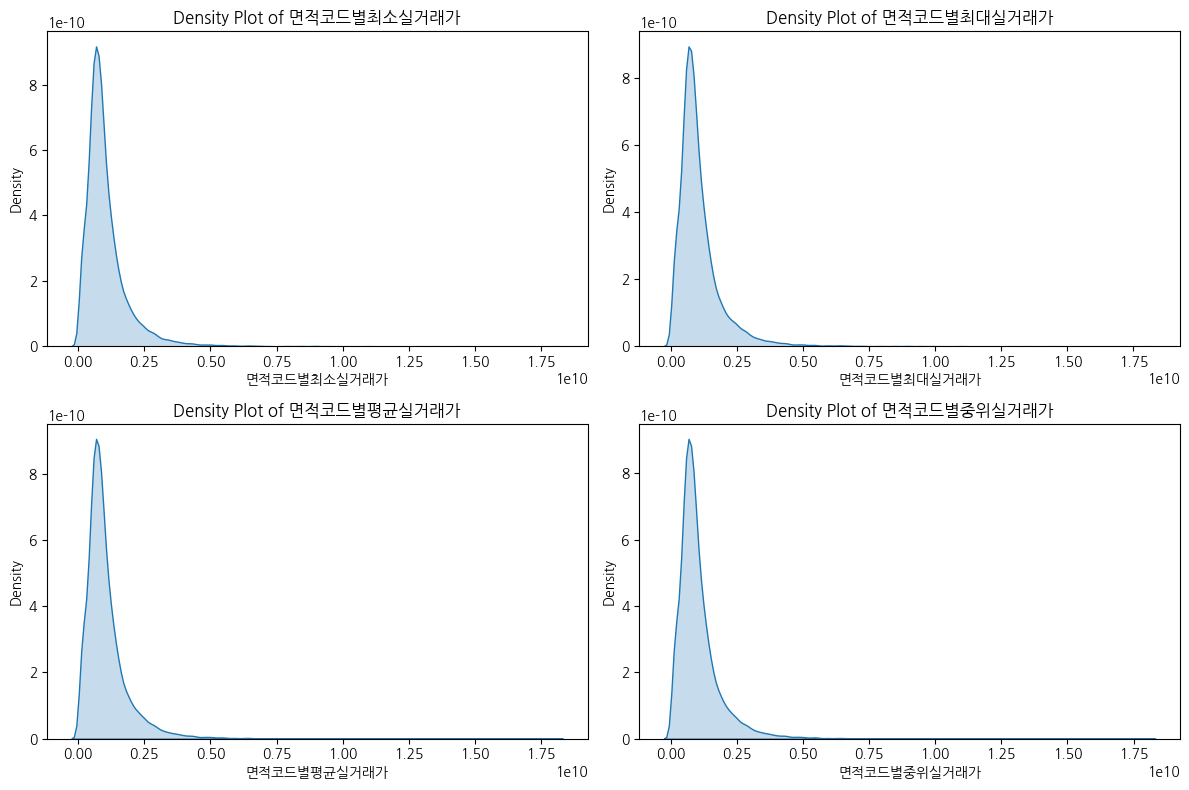

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 플롯 생성
plt.figure(figsize=(12, 8))  # 전체 플롯 크기 설정
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

# 2. 변수별로 subplot에서 KDE (밀도 함수) 그래프 그리기
for i, col in enumerate(trd_numeric_y.columns):
    plt.subplot(2, 2, i + 1)  # 2x2 서브플롯 그리기
    sns.kdeplot(trd_numeric_y[col], shade=True)  # 각 변수에 대해 밀도 함수 그리기
    plt.title(f'Density Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')

plt.tight_layout()  # 서브플롯 간격 자동 조정
plt.show()

###### 반응변수값이 왼쪽으로 치우쳐있으므로 log변환을 통해 스케일링 진행

In [39]:
# 데이터를 스케일링
trd_scaled_y = trd_numeric_y.apply(lambda x: np.log1p(x/1e6))
trd_scaled_y

면적코드별최소실거래가  면적코드별최대실거래가  면적코드별평균실거래가  면적코드별중위실거래가
0         7.074117     7.074117     7.074117     7.074117
1         7.438972     7.438972     7.438972     7.438972
2         7.099202     7.099202     7.099202     7.099202
3         7.300473     7.300473     7.300473     7.300473
4         7.003974     7.003974     7.003974     7.003974
...            ...          ...          ...          ...
29256     6.329721     6.329721     6.329721     6.329721
29257     6.685861     6.685861     6.685861     6.685861
29258     6.594413     6.660575     6.628041     6.628041
29259     6.628041     6.628041     6.628041     6.628041
29260     6.685861     6.685861     6.685861     6.685861

[29261 rows x 4 columns]

In [40]:
'''%pip install pygam
%pip install statsmodels
%pip install ISLP
%pip install scikit-learn
%pip install --upgrade numpy
%pip install --upgrade pandas seaborn scikit-learn'''

'%pip install pygam\n%pip install statsmodels\n%pip install ISLP\n%pip install scikit-learn\n%pip install --upgrade numpy\n%pip install --upgrade pandas seaborn scikit-learn'

In [41]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

trd_conti_x = trd_numeric_x.drop(columns=['시군구코드'])

# 데이터를 스케일링
scaler = StandardScaler()
trd_scaled = scaler.fit_transform(trd_conti_x)  # X_train을 스케일링

# VIF 계산 함수
def calculate_vif(X, columns):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = columns  # 원래 변수명 저장
    vif_data['VIF'] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]  # VIF 계산
    return vif_data

# VIF 계산 및 다중공선성 확인
vif_result = calculate_vif(trd_scaled, trd_conti_x.columns)
print(vif_result)

# VIF가 높은 변수들(예: VIF > 10) 제거
high_vif_columns = vif_result[vif_result['VIF'] > 30]['Feature'].tolist()
print(high_vif_columns)

/root/miniconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


          Feature           VIF
0            면적코드  1.330372e+00
1             거래량  1.299290e+00
2           누적거래량  1.833442e+00
3             회전율  1.714496e+00
4       교차집계구총인구수           inf
5      교차집계구생산인구수           inf
6     교차집계구유소년인구수           inf
7      교차집계구노년인구수           inf
8            인구밀도  5.404743e+00
9          인구밀도지표  5.732684e+00
10           총부양비  3.140136e+06
11         유소년부양비  1.686187e+06
12          노년부양비  2.061606e+06
13          노령화지수  1.785889e+00
14         연령구조지표  1.799014e+01
15      지하철역까지_거리  1.342922e+00
16            공원수  1.512968e+00
17          공원총면적  2.301164e+00
18         환경평가점수  2.326080e+00
19   아파트단지내경사도평균값  3.095671e+00
20   아파트단지내경사도최저값  1.353626e+00
21   아파트단지내경사도최고값  3.316058e+00
22  아파트단지인근경사도평균값  5.906325e+00
23  아파트단지인근경사도최고값  2.248940e+00
24      차량접근가능시설수  5.029305e+09
25      도보접근가능시설수           inf
26    아파트단지내표고평균값  4.274104e+01
27    아파트단지내표고최저값  1.921573e+01
28    아파트단지내표고최고값  2.222437e+01
29   아파트단지인근표고평균값  1.632608e+01
30   아파트

In [42]:
# VIF 계산 및 다중공선성 확인

trd_vif = trd_conti_x.drop(columns=['교차집계구총인구수','교차집계구생산인구수','총부양비','연령구조지표','아파트단지내표고평균값','아파트단지인근표고평균값','기존_가계대출','30_car','45_car','60_car','30_walk'])

# 데이터를 스케일링
scaler = StandardScaler()
trd_scaled = scaler.fit_transform(trd_vif)  # X_train을 스케일링

vif_result = calculate_vif(trd_scaled, trd_vif.columns)
print(vif_result)

          Feature        VIF
0            면적코드   1.295695
1             거래량   1.291087
2           누적거래량   1.792344
3             회전율   1.684565
4     교차집계구유소년인구수   6.991440
5      교차집계구노년인구수   6.517037
6            인구밀도   5.380530
7          인구밀도지표   5.690973
8          유소년부양비   3.353485
9           노년부양비   2.352633
10          노령화지수   1.551825
11      지하철역까지_거리   1.341264
12            공원수   1.491306
13          공원총면적   2.286633
14         환경평가점수   2.304042
15   아파트단지내경사도평균값   3.011502
16   아파트단지내경사도최저값   1.350928
17   아파트단지내경사도최고값   3.224854
18  아파트단지인근경사도평균값   3.590354
19  아파트단지인근경사도최고값   2.177367
20      차량접근가능시설수   3.075667
21      도보접근가능시설수   4.858842
22    아파트단지내표고최저값   8.247941
23    아파트단지내표고최고값   9.154006
24   아파트단지인근표고최저값   4.049817
25   아파트단지인근표고최고값   3.542897
26            cpi  10.626783
27    경제심리지수(원계열)  15.186934
28        신규_가계대출   6.075194
29           기준금리  19.796600
30         15_car   3.809296
31         5_walk   1.736835
32        10_walk   3.090299
33        20_w

In [43]:
trd_filtered_x = pd.concat([trd_vif,trd_numeric_x['시군구코드']], axis=1)
trd_filtered_x

면적코드  거래량  누적거래량   회전율  교차집계구유소년인구수  교차집계구노년인구수     인구밀도  인구밀도지표  \
0         2    1     12  0.51        289.0       813.0  3834.35     4.0   
1         4    1      1  0.51        289.0       813.0  3834.35     4.0   
2         2    1     17  0.51        289.0       813.0  3834.35     4.0   
3         3    1      9  0.51        289.0       813.0  3834.35     4.0   
4         2    1     10  0.51        348.0       839.0  4398.11     5.0   
...     ...  ...    ...   ...          ...         ...      ...     ...   
29256     3    1      8  5.56         33.0        62.0  1130.31     2.0   
29257     2    1      4  0.11       1340.0       743.0  3689.55     4.0   
29258     2    2      3  0.21       1340.0       743.0  3689.55     4.0   
29259     2    1      5  0.11       1340.0       743.0  3689.55     4.0   
29260     2    1      6  0.11       1340.0       743.0  3689.55     4.0   

       유소년부양비  노년부양비   노령화지수  지하철역까지_거리  공원수      공원총면적  환경평가점수  아파트단지내경사도평균값  \
0       12.62  35.50  281.31   0.179291   11  424155.47      83           6.2   
1       12.62  35.50  281.31   0.179291   11  424155.47      83           6.2   
2       12.62  35.50  281.31   0.179291   11  424155.47      83           6.2   
3       12.62  35.50  281.31   0.179291   11  424155.47      83           6.2   
4       12.77  30.79  241.09   0.179291   11  424155.47      83           6.2   
...       ...    ...     ...        ...  ...        ...     ...           ...   
29256    9.97  18.73  187.88   0.351432    4  637014.70      86           4.3   
29257   32.37  17.95   55.45   1.576972    6  129917.30      76           2.2   
29258   32.37  17.95   55.45   1.576972    6  129917.30      76           2.2   
29259   32.37  17.95   55.45   1.576972    6  129917.30      76           2.2   
29260   32.37  17.95   55.45   1.576972    6  129917.30      76           2.2   

       아파트단지내경사도최저값  아파트단지내경사도최고값  아파트단지인근경사도평균값  아파트단지인근경사도최고값  차량접근가능시설수  \
0               0.0          67.3           15.2           82.2      14693   
1               0.0          67.3           15.2           82.2      14693   
2               0.0          67.3           15.2           82.2      14693   
3               0.0          67.3           15.2           82.2      14693   
4               0.0          67.3           15.2           82.2      14693   
...             ...           ...            ...            ...        ...   
29256           0.1          25.2            5.7           78.5      15118   
29257           0.0          36.0            4.2           64.5       5999   
29258           0.0          36.0            4.2           64.5       5999   
29259           0.0          36.0            4.2           64.5       5999   
29260           0.0          36.0            4.2           64.5       5999   

       도보접근가능시설수  아파트단지내표고최저값  아파트단지내표고최고값  아파트단지인근표고최저값  아파트단지인근표고최고값  \
0            648         46.5         60.5          38.8         170.3   
1            648         46.5         60.5          38.8         170.3   
2            648         46.5         60.5          38.8         170.3   
3            648         46.5         60.5          38.8         170.3   
4            648         46.5         60.5          38.8         170.3   
...          ...          ...          ...           ...           ...   
29256        476         28.3         31.5           5.5         129.3   
29257        285         18.5         23.1          11.8          32.0   
29258        285         18.5         23.1          11.8          32.0   
29259        285         18.5         23.1          11.8          32.0   
29260        285         18.5         23.1          11.8          32.0   

          cpi  경제심리지수(원계열)  신규_가계대출  기준금리  15_car  5_walk  10_walk  20_walk  \
0      110.77         94.2     4.82  8.00    3803      27       74      241   
1      110.52         91.7     4.96  8.00    3803      27       74      241   
2      112.85         93.1     4.90  8.50    3803      27       74    

## GAM 모델 적합

In [44]:
trd_group = pd.concat([trd_filtered_x,trd_scaled_y],axis=1)
trd_group.to_feather('../data/make_data/trd_group.feather')

In [45]:
import pandas as pd
from pygam import GAM, s, f
from sklearn.model_selection import train_test_split

# 데이터 분할 (훈련/검증)
X_train, X_test, y_train, y_test = train_test_split(trd_filtered_x, trd_scaled_y['면적코드별평균실거래가'], test_size=0.2, random_state=42)

# GAM 모델 구축
gam = GAM(s(0,lam=100)+s(1,lam=100)+s(2,lam=100)+s(3,lam=100)+s(4,lam=100)+s(5,lam=100)+s(6,lam=100)+s(7,lam=100)+s(8,lam=100)+s(9,lam=100)+s(10,lam=100)+s(11,lam=100)+s(12,lam=100)+s(13,lam=100)+s(14,lam=100)+s(15,lam=100)+s(16,lam=100)+s(17,lam=100)+s(18,lam=100)+s(19,lam=100)+s(20,lam=100)+s(21,lam=100)+s(22,lam=100)+s(23,lam=100)+s(24,lam=100)+s(25,lam=100)+s(26,lam=100)+s(27,lam=100)+s(28,lam=100)+s(29,lam=100)+s(30,lam=100)+s(31,lam=100)+s(32,lam=100)+s(33,lam=100)+s(34,lam=1)).fit(X_train, y_train)

# 유의성 검정 결과 확인
summary = gam.summary()

# 결과 출력
print(summary)

# 예측
y_pred = gam.predict(X_test)

# 모델 성능 평가
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

GAM                                                                                                       
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    232.6037
Link Function:                     IdentityLink Log Likelihood:                               -142148.6453
Number of Samples:                        23408 AIC:                                            284764.498
                                                AICc:                                           284769.228
                                                GCV:                                                0.0636
                                                Scale:                                              0.0624
                                                Pseudo R-Squared:                                   0.8848
Feature Function                  Lam

/tmp/ipykernel_32610/864883474.py:12: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  summary = gam.summary()


##### 변수 중요도 plot

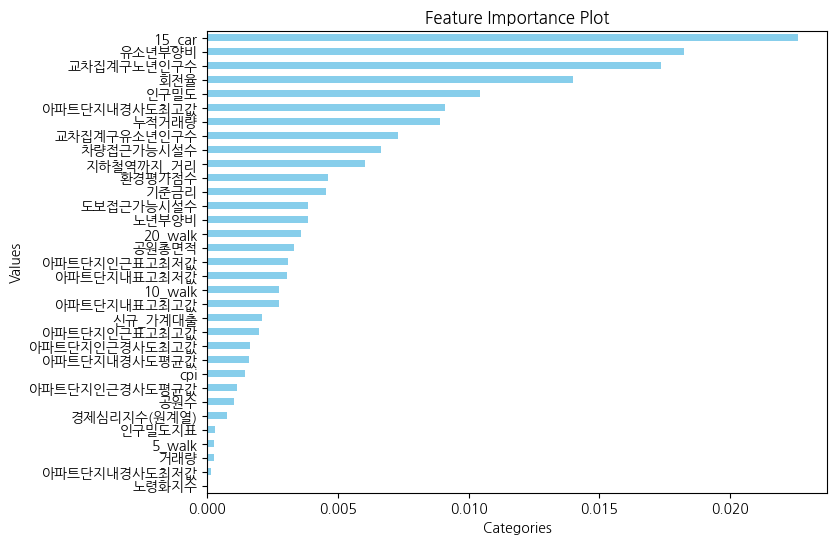

15_car           0.022599
유소년부양비           0.018248
교차집계구노년인구수       0.017347
회전율              0.013996
인구밀도             0.010455
아파트단지내경사도최고값     0.009089
누적거래량            0.008910
교차집계구유소년인구수      0.007298
차량접근가능시설수        0.006630
지하철역까지_거리        0.006033
환경평가점수           0.004631
기준금리             0.004544
도보접근가능시설수        0.003841
노년부양비            0.003840
20_walk          0.003599
공원총면적            0.003337
아파트단지인근표고최저값     0.003074
아파트단지내표고최저값      0.003040
10_walk          0.002752
아파트단지내표고최고값      0.002746
신규_가계대출          0.002095
아파트단지인근표고최고값     0.001967
아파트단지인근경사도최고값    0.001622
아파트단지내경사도평균값     0.001594
cpi              0.001457
아파트단지인근경사도평균값    0.001145
공원수              0.001011
경제심리지수(원계열)      0.000756
인구밀도지표           0.000303
5_walk           0.000272
거래량              0.000241
아파트단지내경사도최저값     0.000126
노령화지수            0.000030
dtype: float64


In [46]:
import warnings
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'

warnings.filterwarnings("ignore")

def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    return mean_squared_error(y, y_pred)

# Permutation Importance 계산
importances = []
base_mse = mean_squared_error(y_test, gam.predict(X_test))  # 모델의 기본 MSE 계산

for i in range(1,X_test.shape[1]-1):
    # X_test를 복사하고 i번째 열을 무작위로 섞음
    X_permuted = X_test.copy()
    X_permuted.iloc[:, i] = np.random.permutation(X_permuted.iloc[:, i].values)  # i번째 열 무작위로 섞기

    # 섞은 데이터로 MSE 계산
    permuted_mse = mean_squared_error(y_test, gam.predict(X_permuted))  # 모델의 예측 수행
    importance = permuted_mse - base_mse  # 중요도 계산
    importances.append(importance)

# 중요도 출력
feature_importance = pd.Series(importances, index=X_test.iloc[:,1:-1].columns).sort_values(ascending=True)
plt.figure(figsize=(8, 6))  # 그래프 크기 설정
feature_importance.plot(kind='barh', color='skyblue')  # 바플롯 그리기
plt.title('Feature Importance Plot')  # 제목
plt.xlabel('Categories')  # x축 레이블
plt.ylabel('Values')  # y축 레이블
plt.xticks(rotation=0)  # x축 레이블 회전 (수평으로)
plt.show()  # 그래프 표시
print(feature_importance.sort_values(ascending=False))

##### 부분의존도 plot

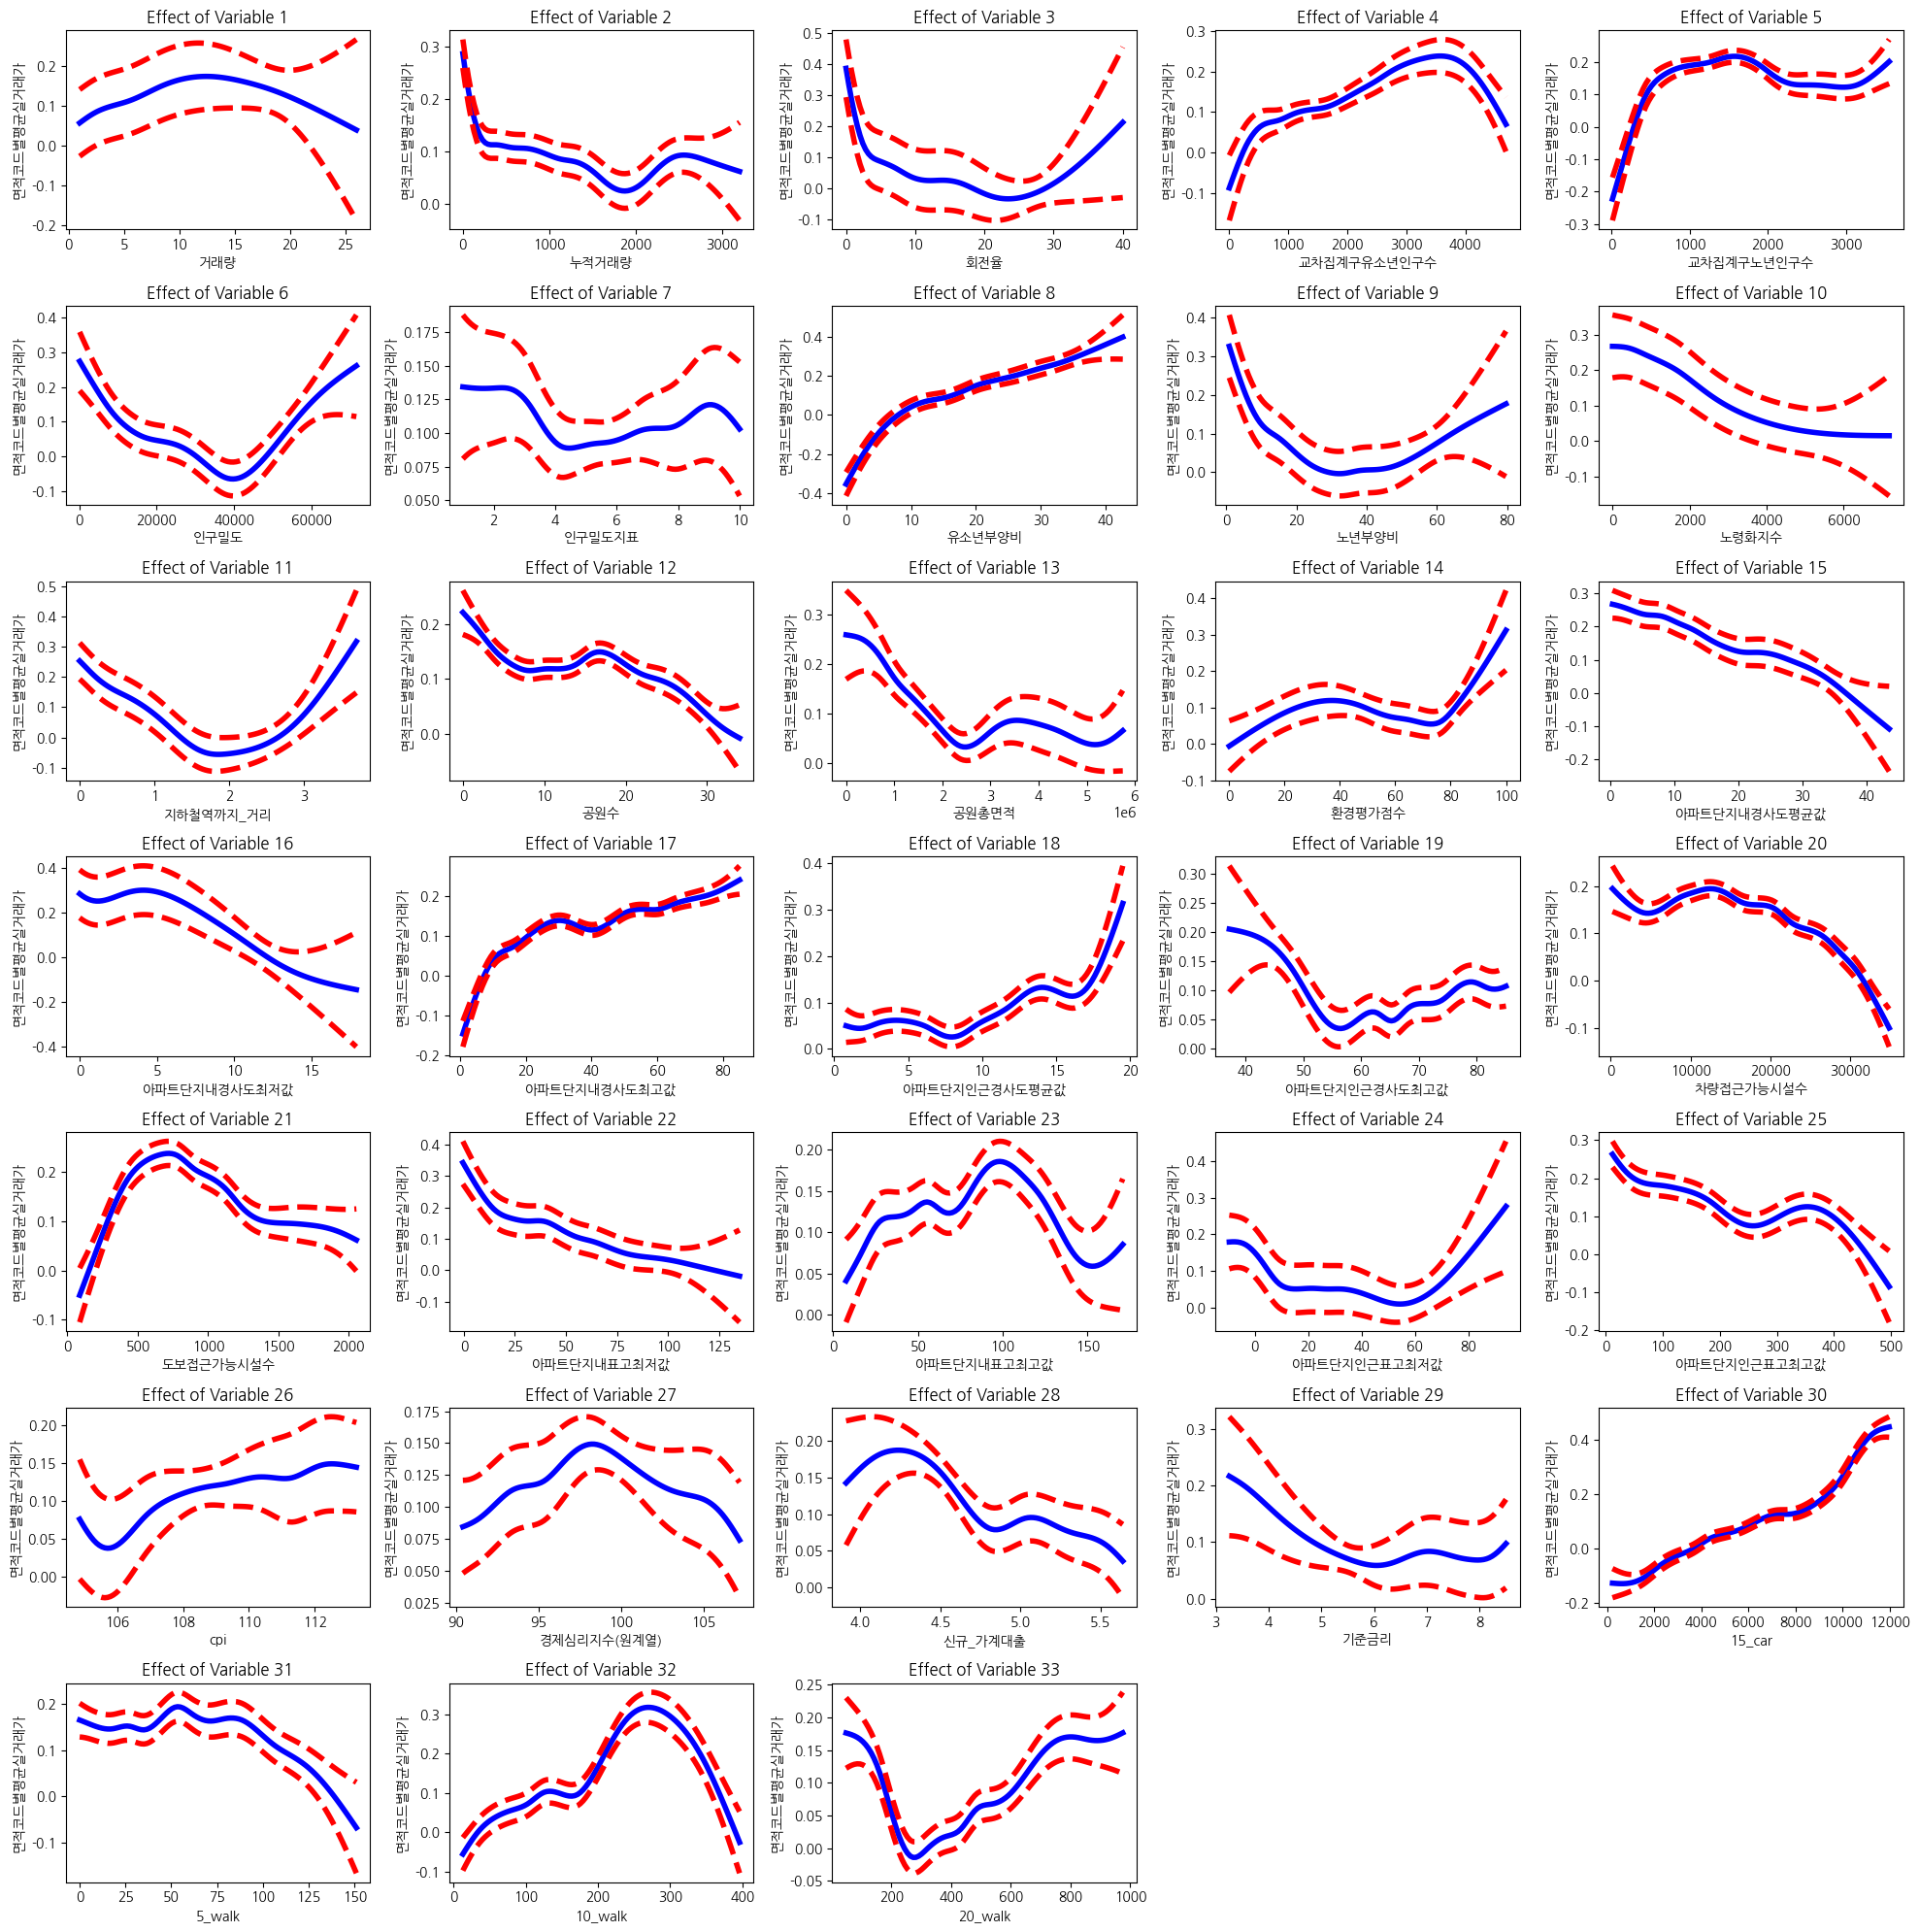

In [47]:
import pandas as pd
from pygam import GAM, s, f
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from ISLP.pygam import plot

# 변수별 효과 시각화
plt.figure(figsize=(20, 20))  # 그래프를 그릴 공간 크기 설정

for i in range(1,34):
    plt.subplot(7, 5, i)  # 35개의 subplot을 만듭니다 (5열로 나눠서)
    plot(gam, i, ax=plt.gca())  # ISLP.pygam의 plot 함수를 사용하여 각 변수를 시각화
    plt.title(f'Effect of Variable {i}')  # 변수의 번호를 제목으로 설정
    plt.xlabel(trd_filtered_x.columns[i])  # x축 라벨 설정
    plt.ylabel('면적코드별평균실거래가')  # y축 라벨 설정

plt.tight_layout()  # 그래프 간격을 자동으로 조정
plt.show()

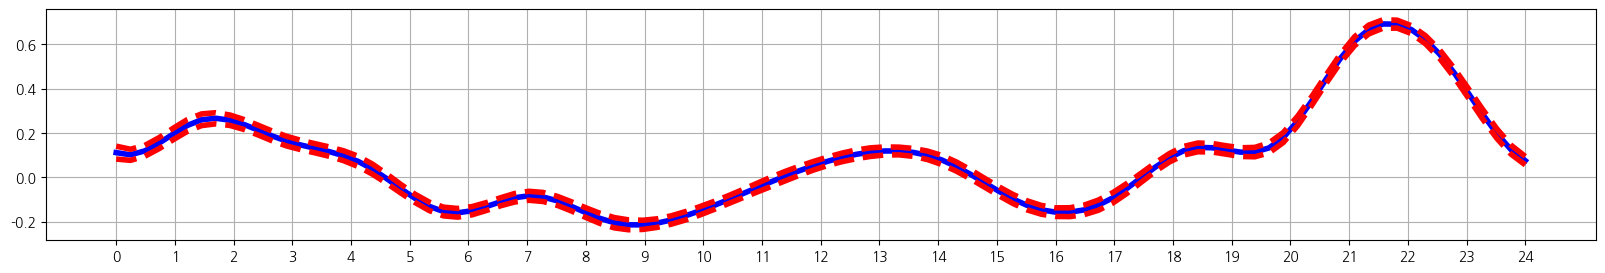

In [48]:
plt.figure(figsize=(20,3))
plot(gam,34)
plt.xticks(range(0,25,1))
plt.grid(True)
plt.show()

## 면적코드별 부분의존도 plot

면적코드: 1
Mean Squared Error: 0.10


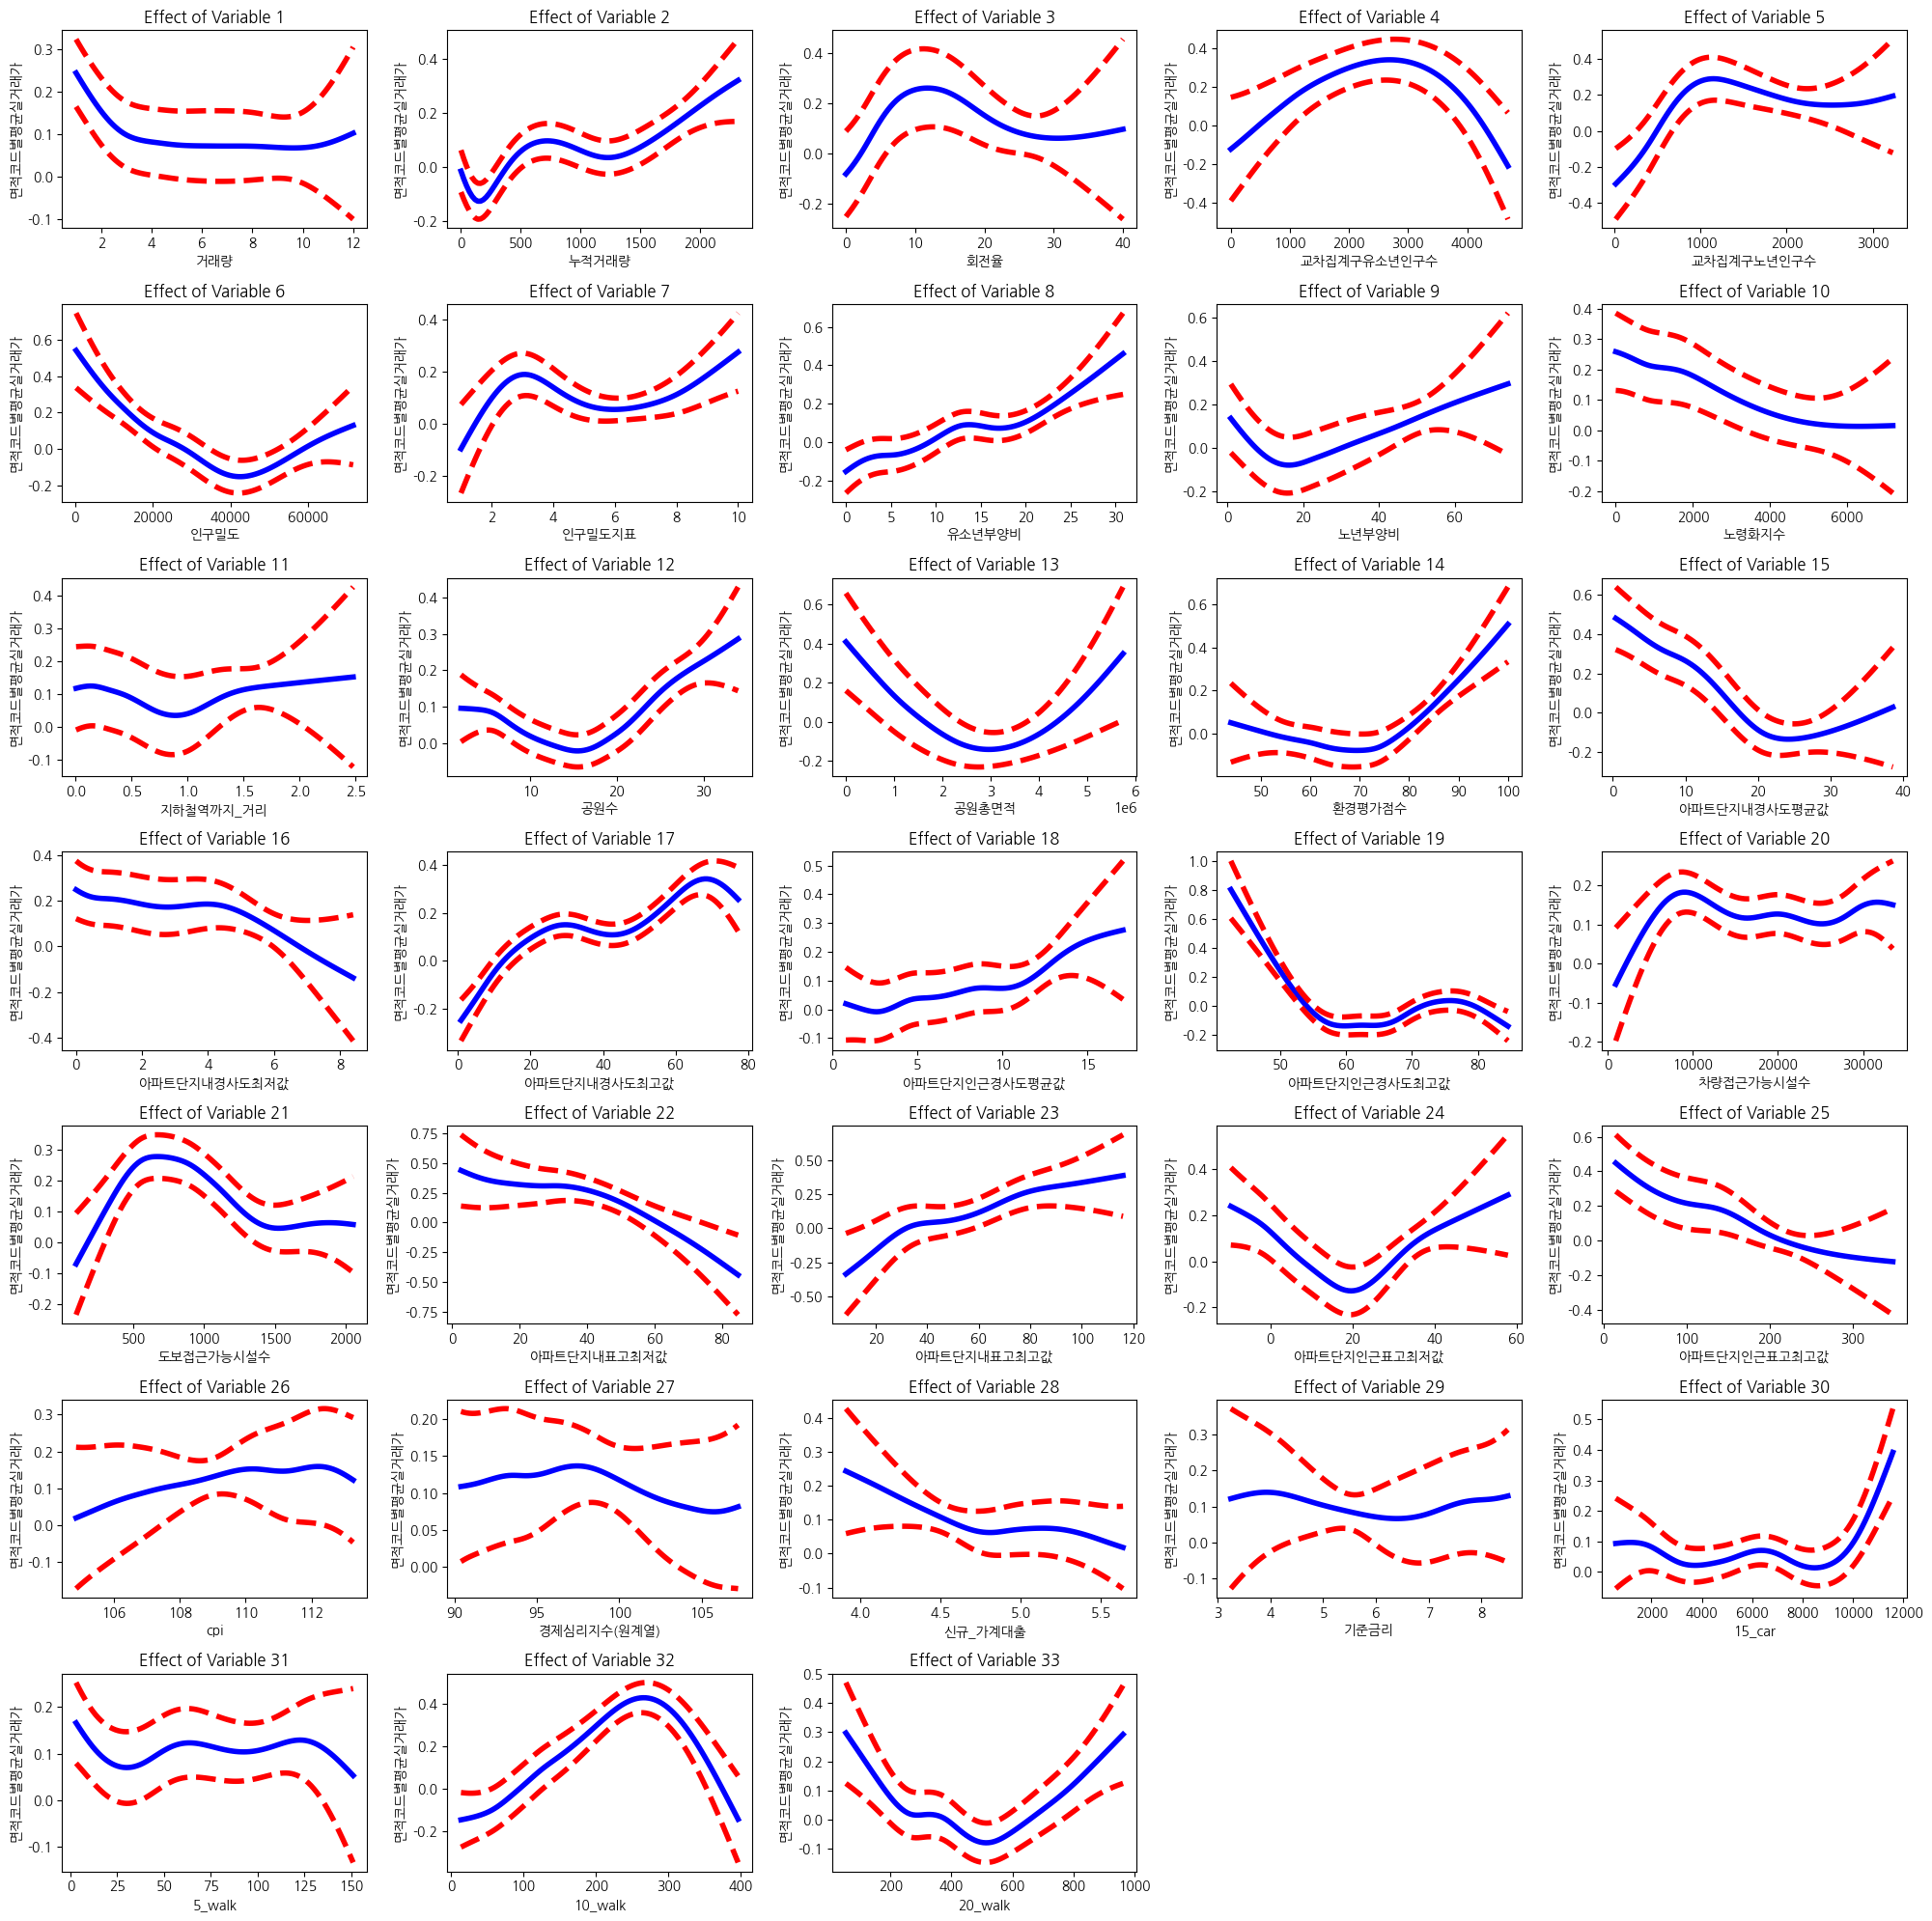

면적코드: 2
Mean Squared Error: 0.04


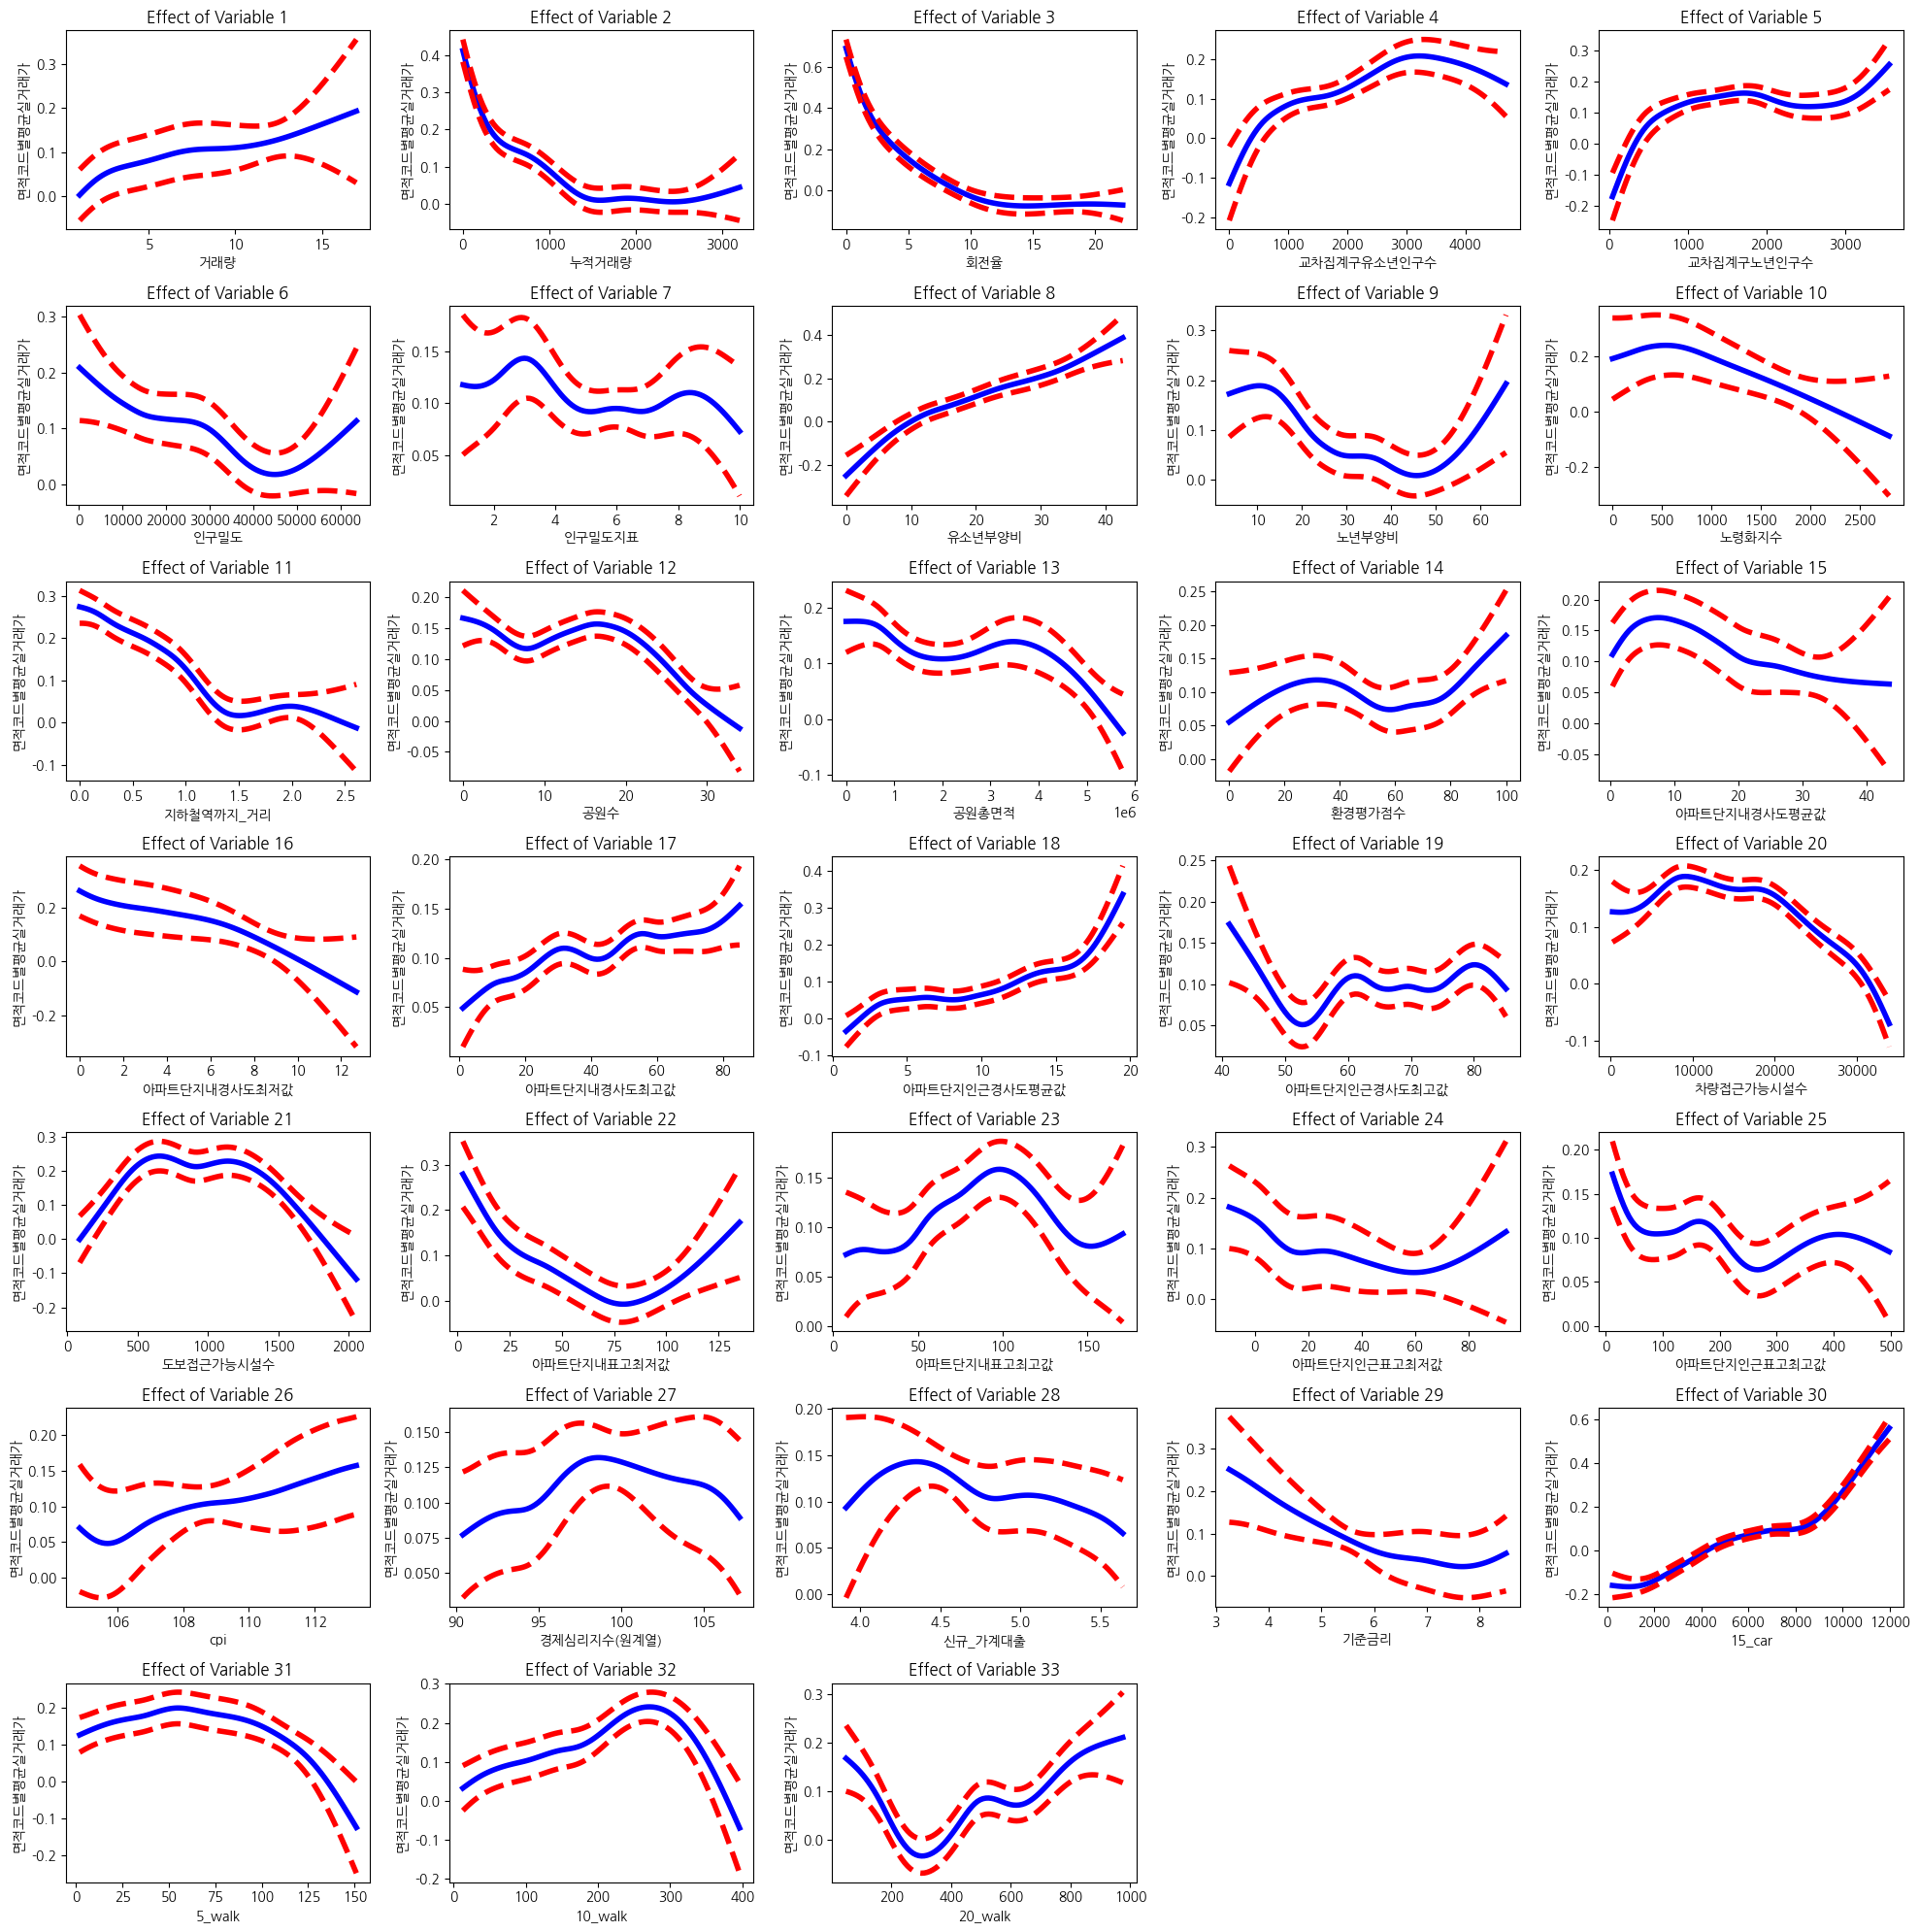

면적코드: 3
Mean Squared Error: 0.03


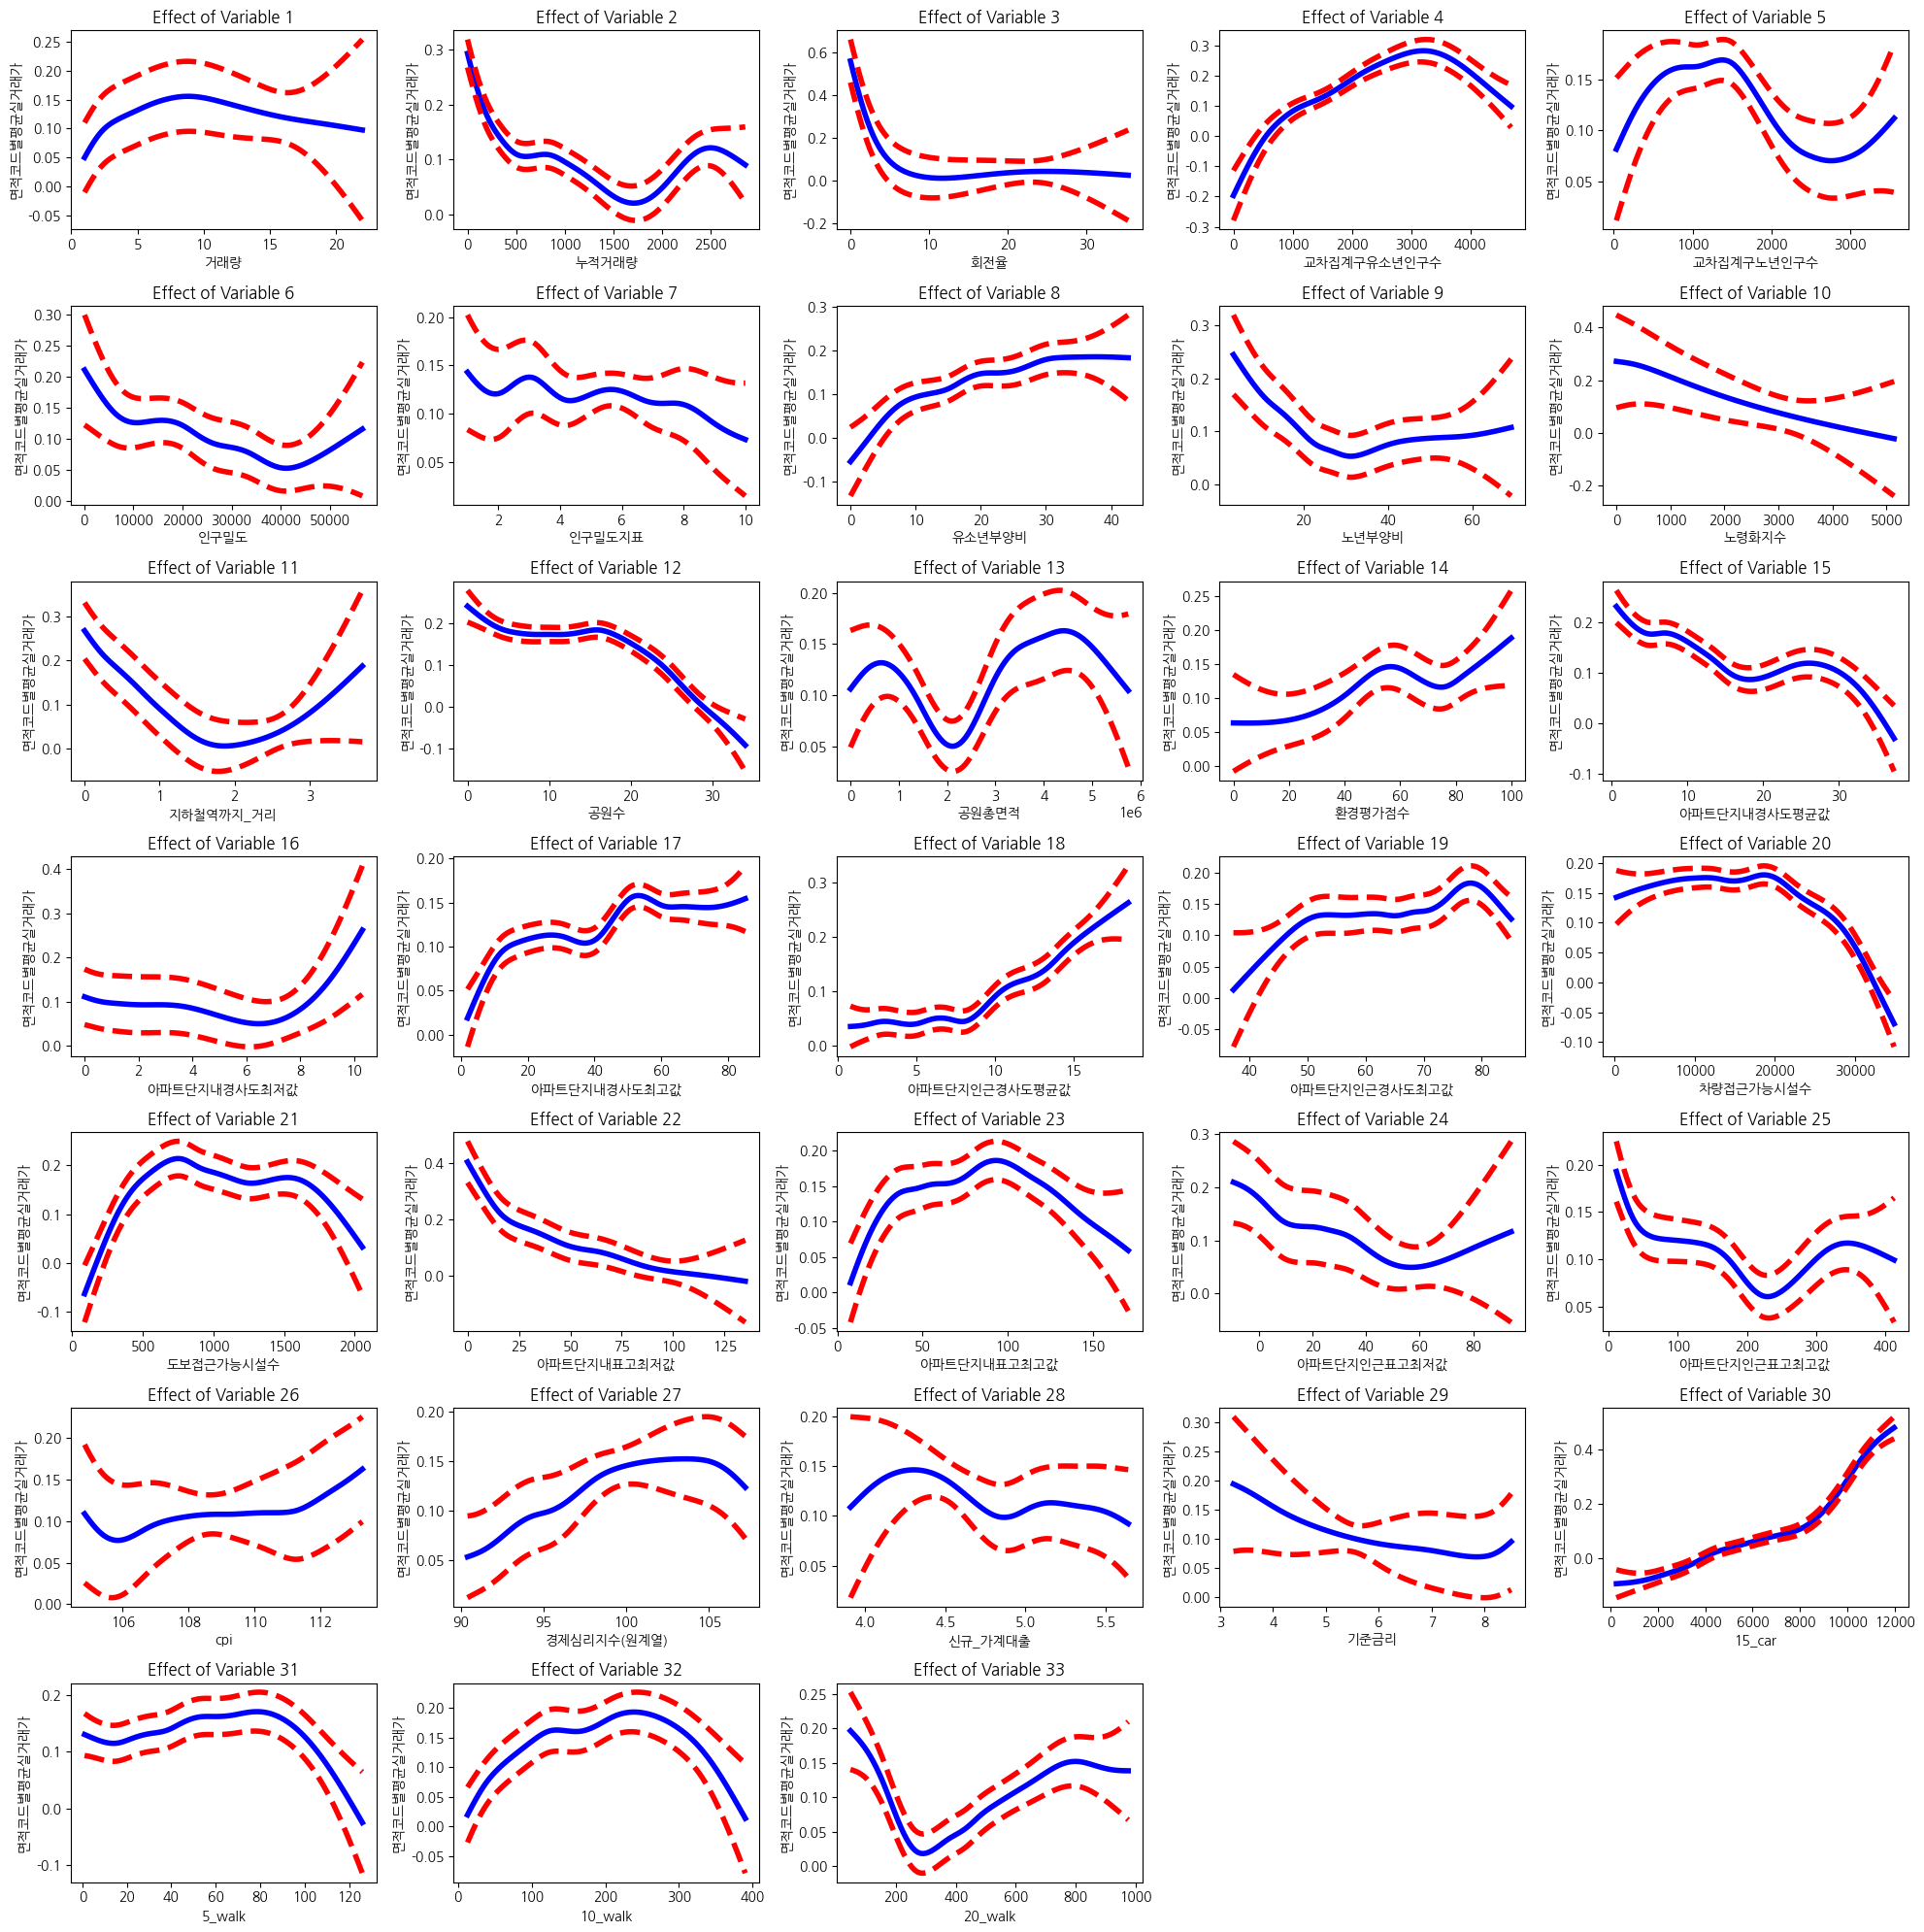

면적코드: 4
Mean Squared Error: 0.04


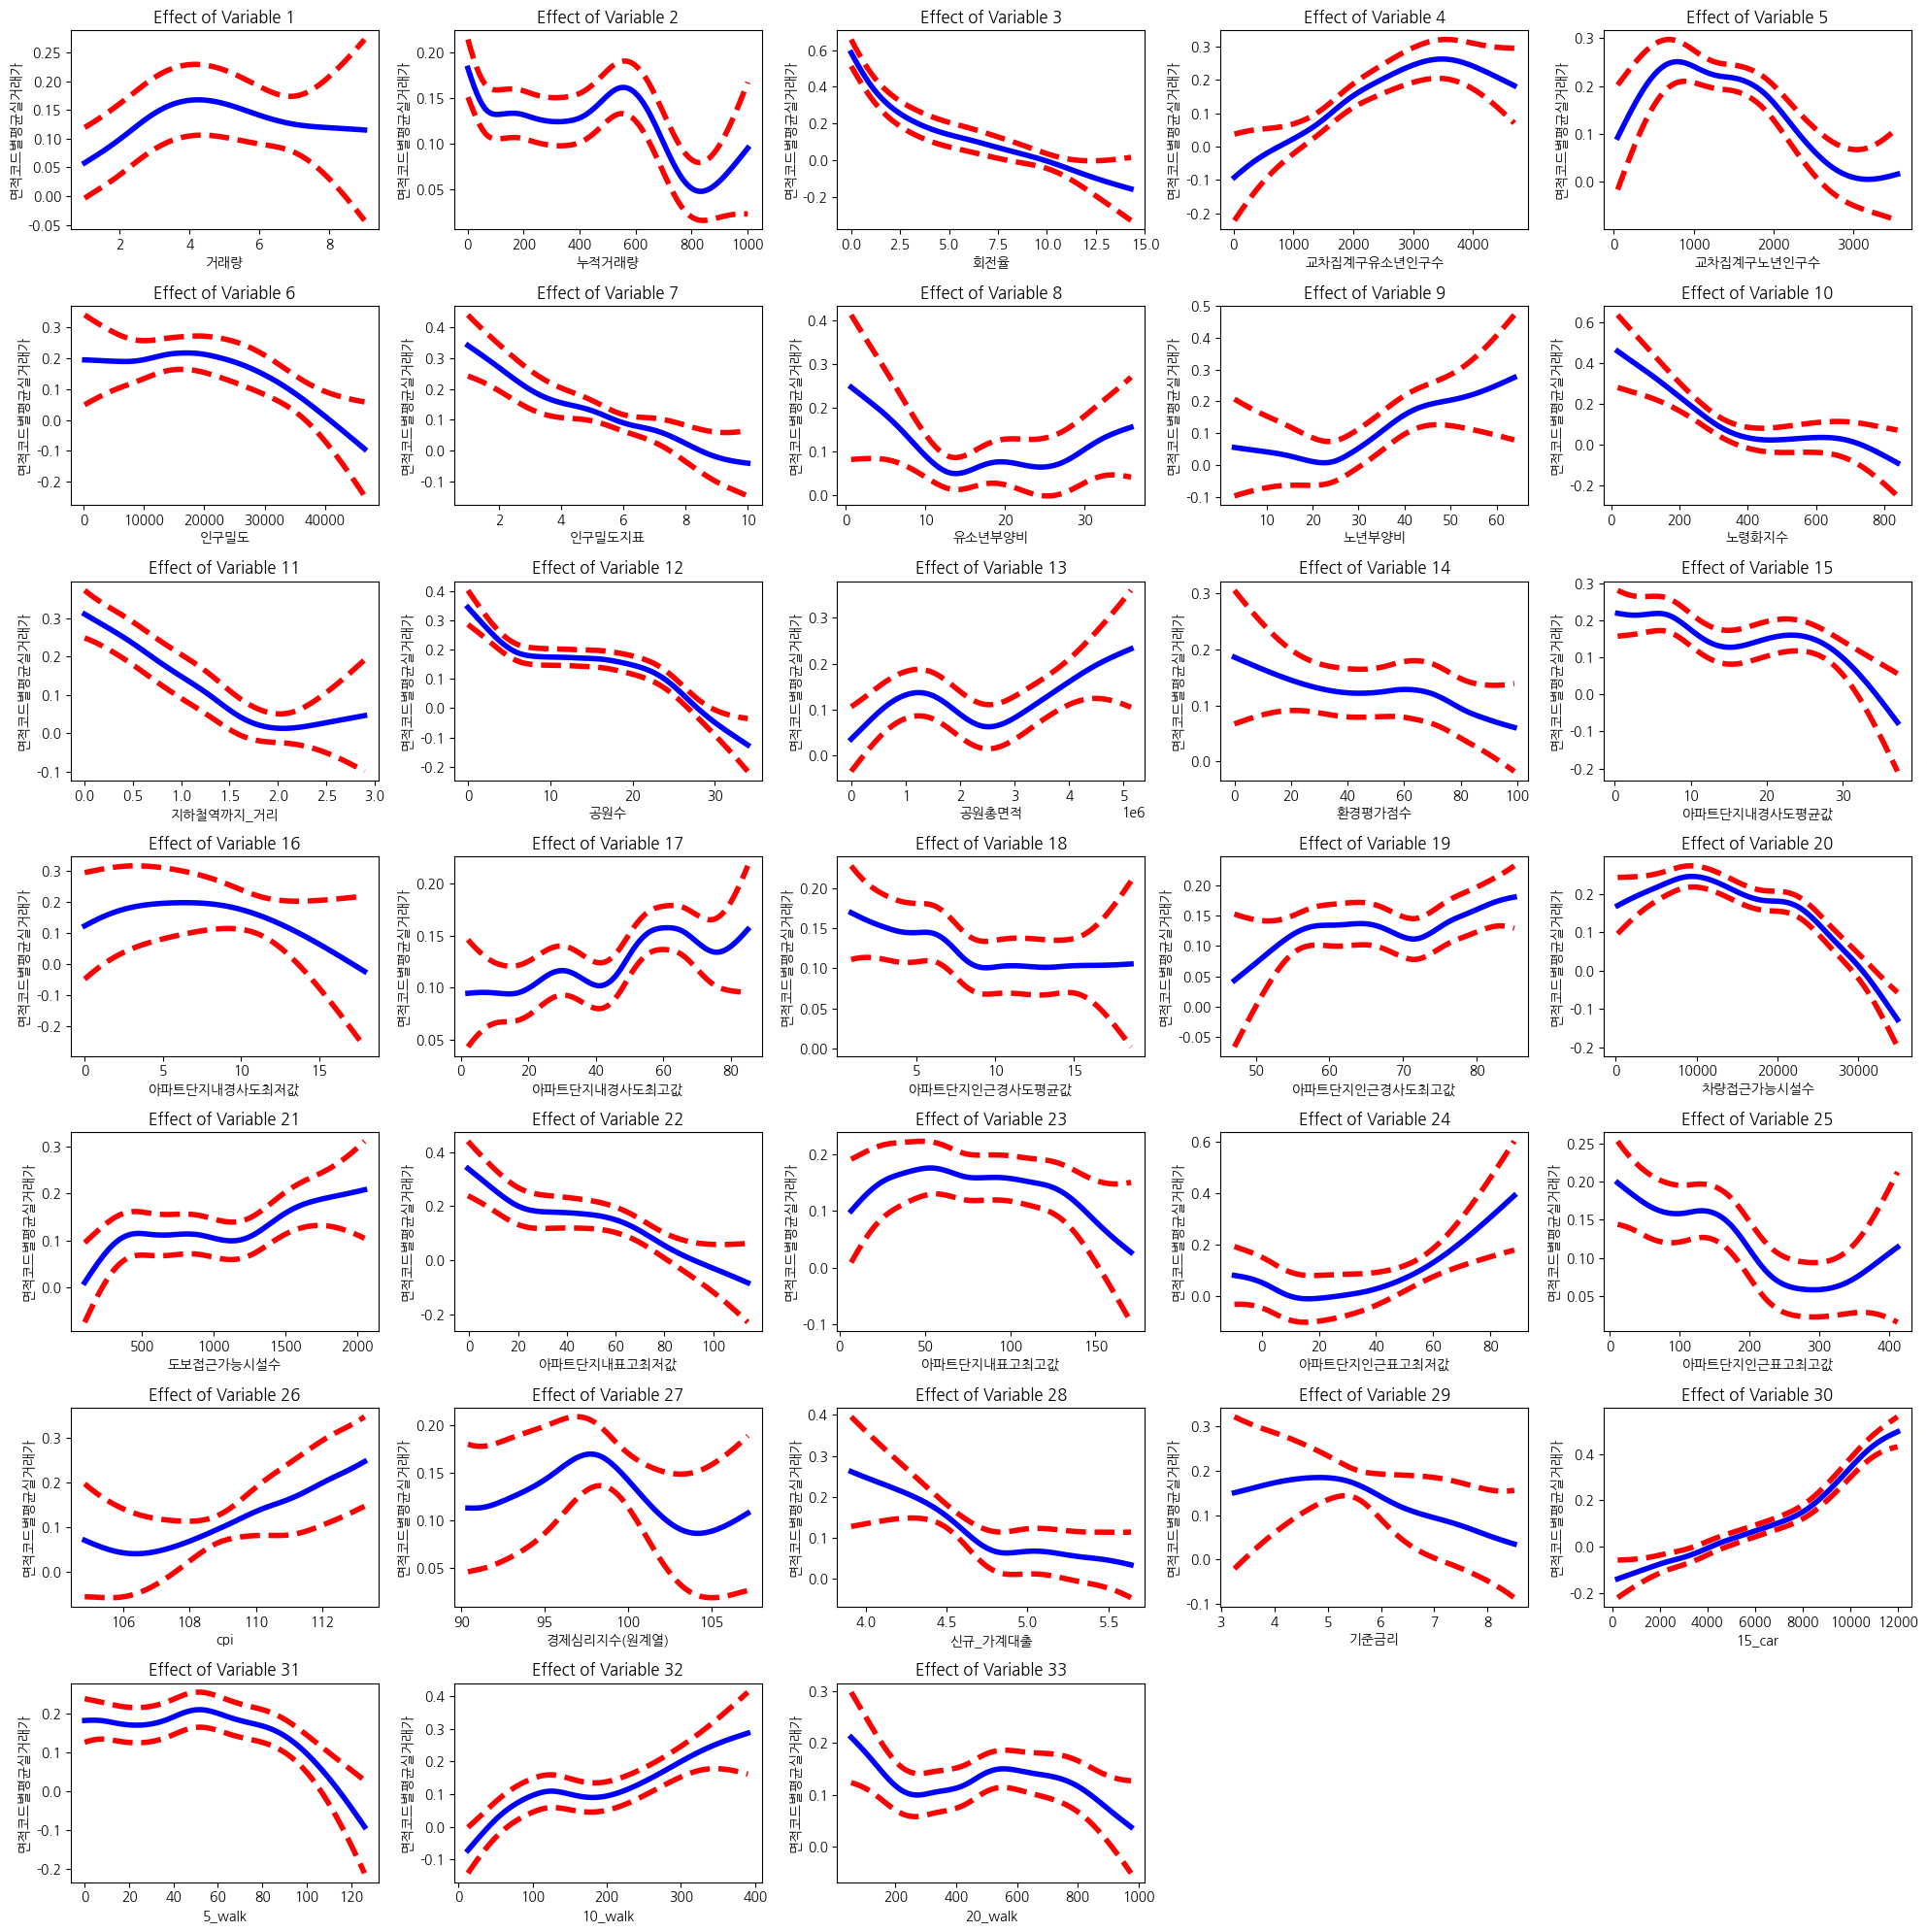

면적코드: 5
Mean Squared Error: 0.08


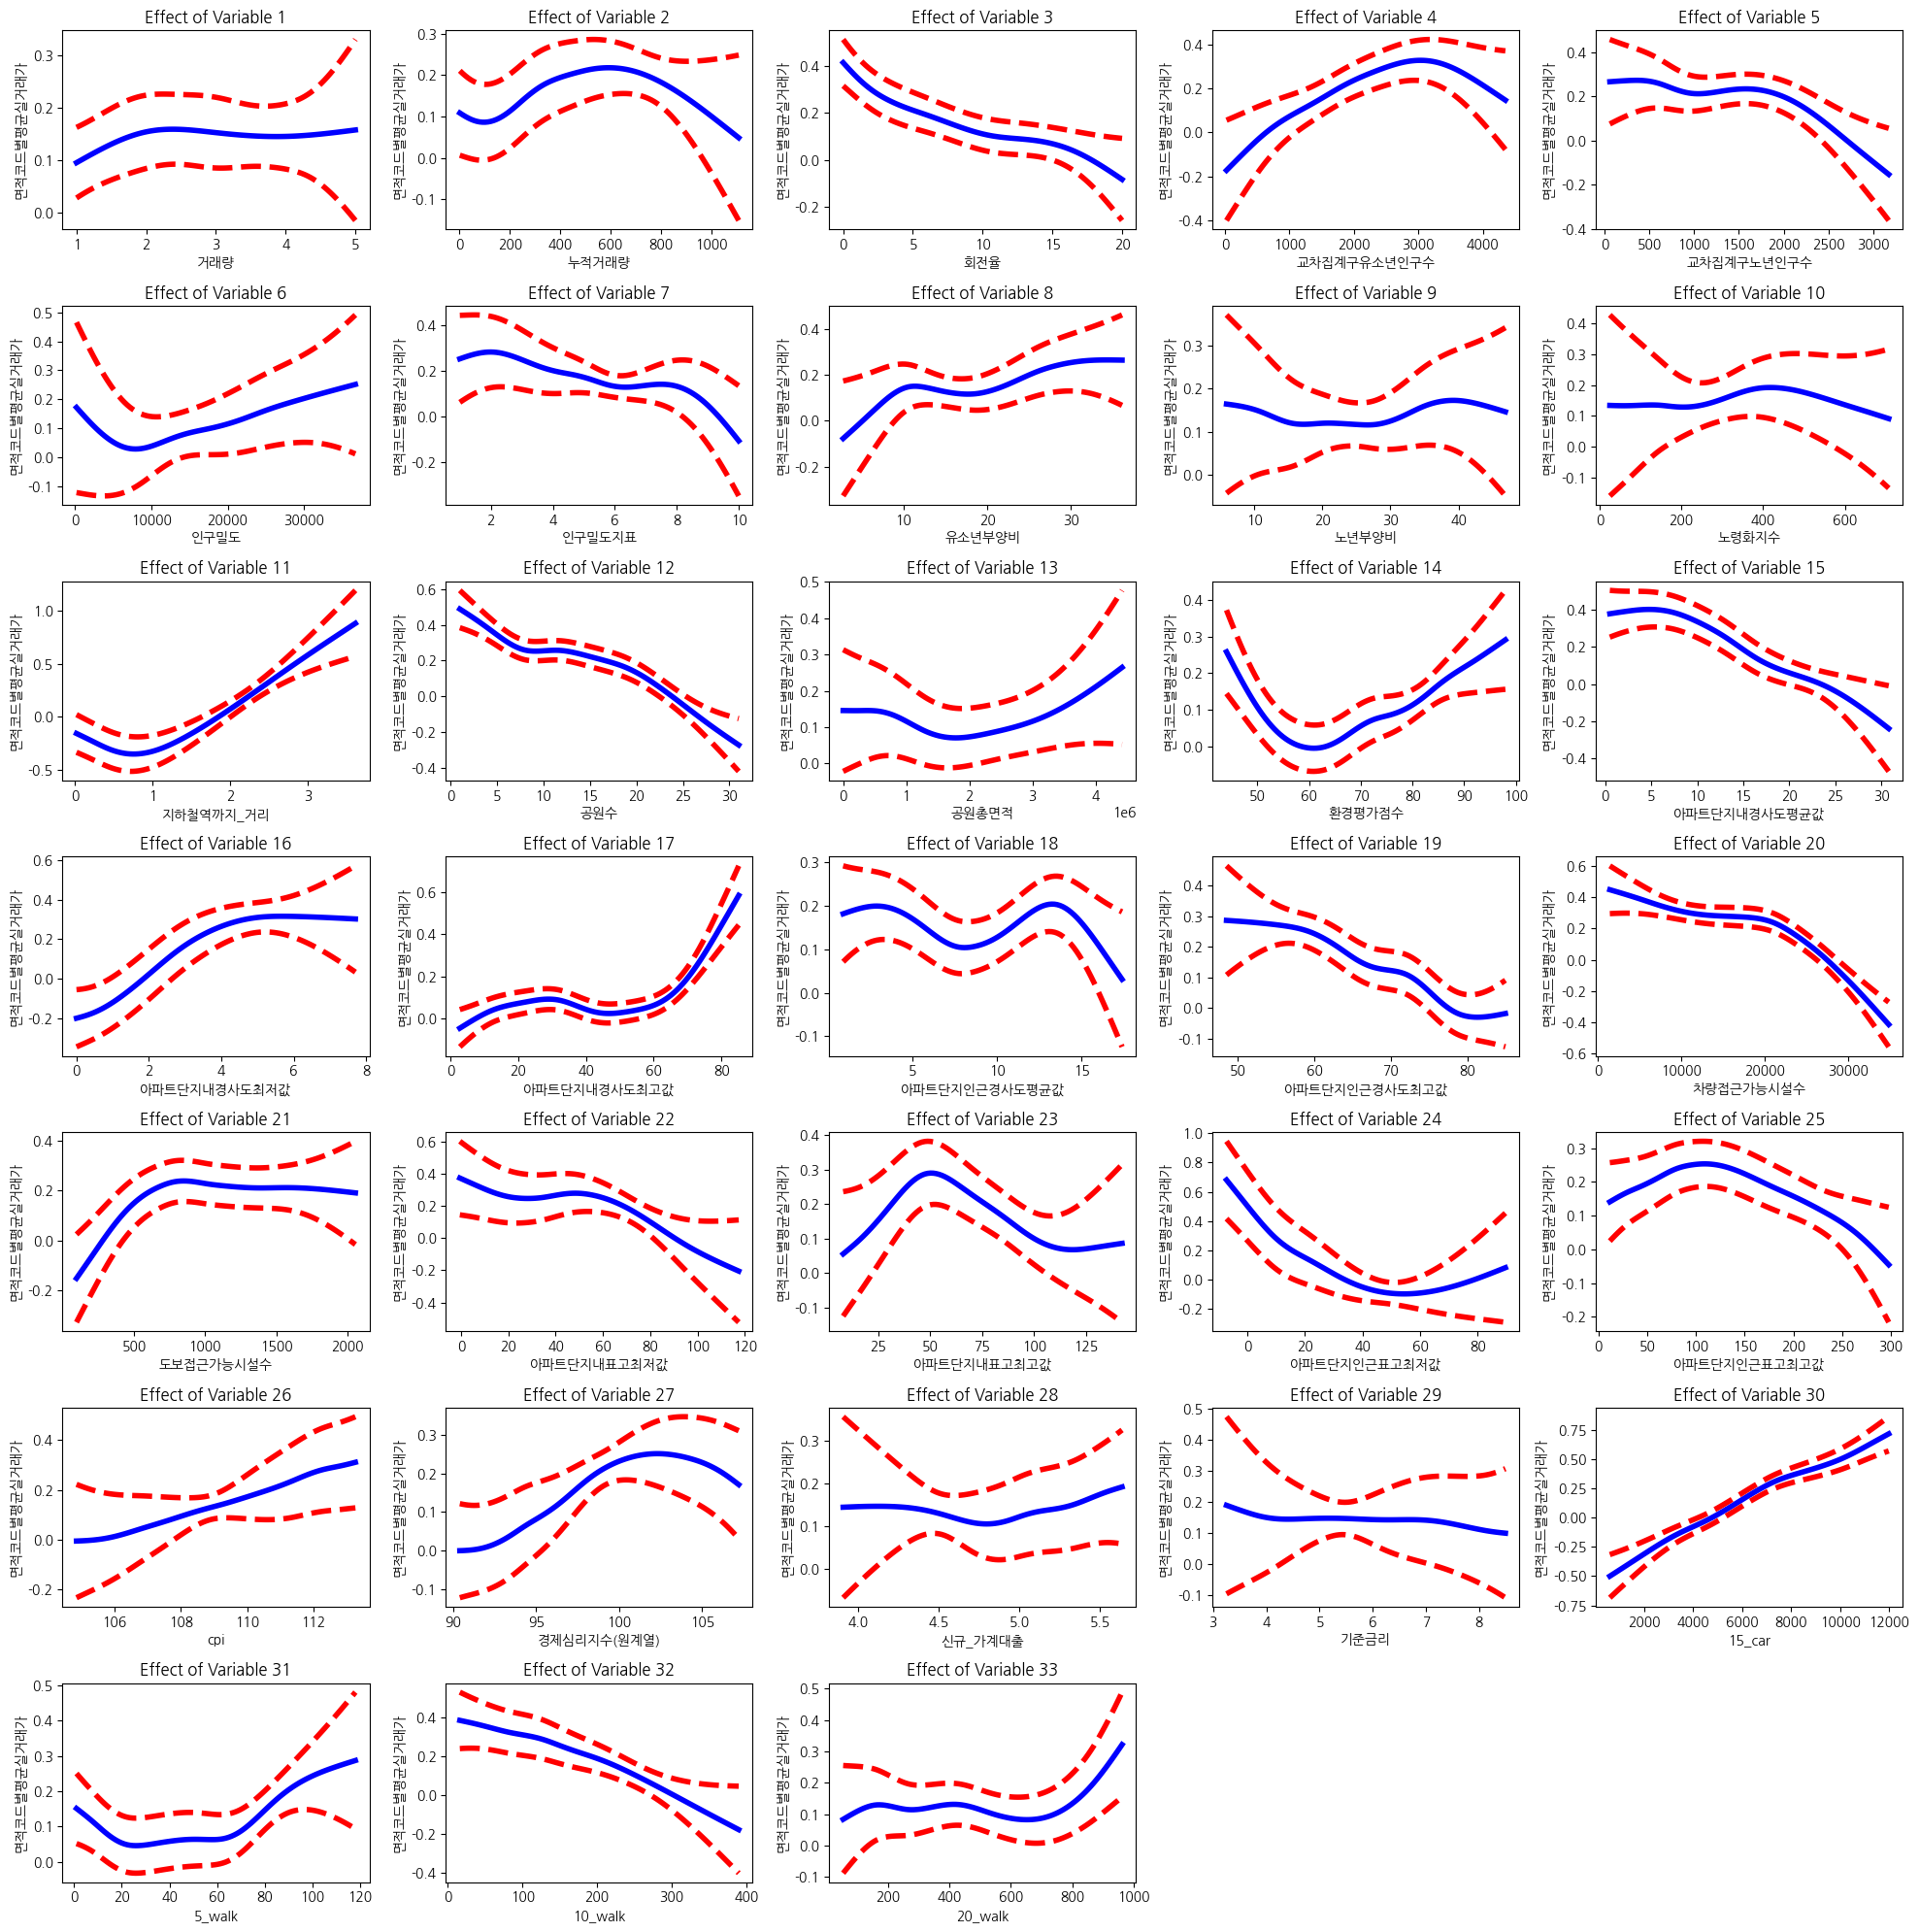

In [49]:
for i in range(1,6):
    trd = trd_group[trd_group['면적코드']==i].drop(columns=['면적코드'])
    trd_y = trd[['면적코드별최소실거래가','면적코드별최대실거래가','면적코드별평균실거래가','면적코드별중위실거래가']].reset_index(drop=True)
    trd_x = trd.drop(columns=['면적코드별최소실거래가','면적코드별최대실거래가','면적코드별평균실거래가','면적코드별중위실거래가']).reset_index(drop=True)

    plt.rcParams['font.family'] = 'NanumGothic'
    plt.rcParams['axes.unicode_minus'] = False

    # 데이터 분할 (훈련/검증)
    X_train, X_test, y_train, y_test = train_test_split(trd_x, trd_y['면적코드별평균실거래가'], test_size=0.2, random_state=42)

    # GAM 모델 구축
    gam = GAM(s(0,lam=100)+s(1,lam=100)+s(2,lam=100)+s(3,lam=100)+s(4,lam=100)+s(5,lam=100)+s(6,lam=100)+s(7,lam=100)+s(8,lam=100)+s(9,lam=100)+s(10,lam=100)+s(11,lam=100)+s(12,lam=100)+s(13,lam=100)+s(14,lam=100)+s(15,lam=100)+s(16,lam=100)+s(17,lam=100)+s(18,lam=100)+s(19,lam=100)+s(20,lam=100)+s(21,lam=100)+s(22,lam=100)+s(23,lam=100)+s(24,lam=100)+s(25,lam=100)+s(26,lam=100)+s(27,lam=100)+s(28,lam=100)+s(29,lam=100)+s(30,lam=100)+s(31,lam=100)+s(32,lam=100)+s(33,lam=1)).fit(X_train, y_train)

    # 예측
    y_pred = gam.predict(X_test)

    # 모델 성능 평가
    from sklearn.metrics import mean_squared_error
    mse = mean_squared_error(y_test, y_pred)
    print(f'면적코드: {i}')
    print(f'Mean Squared Error: {mse:.2f}')

    # 변수별 효과 시각화
    plt.figure(figsize=(20, 20))  # 그래프를 그릴 공간 크기 설정

    for i in range(0,33):
        plt.subplot(7, 5, i + 1)  # 38개의 subplot을 만듭니다 (2열로 나눠서)
        plot(gam, i, ax=plt.gca())  # ISLP.pygam의 plot 함수를 사용하여 각 변수를 시각화
        plt.title(f'Effect of Variable {i+1}')  # 변수의 번호를 제목으로 설정
        plt.xlabel(trd_x.columns[i])  # x축 라벨 설정
        plt.ylabel('면적코드별평균실거래가')  # y축 라벨 설정

    plt.tight_layout()  # 그래프 간격을 자동으로 조정
    plt.show()